# Capstone Project 2: Model building

We have cleaned the data. Now it is the time to build models.

We will test different modeling methods and compare them.

The dataset is download from Kaggle. It is about house price. The goal will be use this dataset and build a predictive model for house pricing.

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

## The objective 
The objective of this project would be building a predictive model for house pricing. The result can be used to negotiate house price.

It is a good dataset for exploratory data analysis and compare popuplar regression algorithms.

The modeling method can be linear regression, Lasso, ridge, random forest, gradient boosting, and SVR...
And compare them and pick the best performance one for prediction

In [1]:
#!pip install xgboost

### STEP1: Load the tools

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost
#from xgboost import XBGRegressor
from sklearn.linear_model import ElasticNet
import lightgbm as lgb
from catboost import CatBoostRegressor
from bayes_opt import BayesianOptimization


import time

import pickle

from sklearn.metrics import r2_score, mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### STEP2: Load the dataset

In [3]:
# load the data for training validate and the model
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [4]:
X_train.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,21,22,23,24,25,26,27,28,29,30
0,0,0.699754,0.028662,-0.685929,0.064781,-0.701128,-0.030457,-0.043093,-0.13025,-0.292426,...,-0.279145,-0.478466,-0.616275,1.900292,-0.394013,-0.231756,-0.17762,-0.114654,-0.074778,-0.030457
1,1,-0.997654,-1.356633,-0.850924,-1.824137,-0.009884,-0.030457,-0.043093,-0.13025,-0.292426,...,-0.279145,2.090014,-0.616275,-0.526235,-0.394013,-0.231756,-0.17762,-0.114654,-0.074778,-0.030457
2,2,0.458678,-0.369268,0.313465,-0.729392,0.911774,-0.030457,-0.043093,-0.13025,-0.292426,...,-0.279145,-0.478466,-0.616275,-0.526235,2.537987,-0.231756,-0.17762,-0.114654,-0.074778,-0.030457
3,3,-1.620102,-0.886578,-1.067774,-1.302961,-0.964459,-0.030457,-0.043093,-0.13025,3.419666,...,3.582364,-0.478466,-0.616275,-0.526235,-0.394013,-0.231756,-0.17762,-0.114654,-0.074778,-0.030457
4,4,-0.132154,0.986182,0.544457,0.773469,-0.207382,-0.030457,-0.043093,-0.13025,-0.292426,...,-0.279145,-0.478466,-0.616275,1.900292,-0.394013,-0.231756,-0.17762,-0.114654,-0.074778,-0.030457


In [5]:
X_train = X_train.drop(columns=['Unnamed: 0']).values
X_test = X_test.drop(columns=['Unnamed: 0']).values

In [6]:
y_train = y_train.drop(columns=['Unnamed: 0']).values
y_test = y_test.drop(columns=['Unnamed: 0']).values

### STEP5: Modeling

In [7]:
### this dictionary will be used to save all the RMSE scores of using different regression method.
score = {}
Time = {}

#### 5.1 Linear Regression

In [8]:
t0 = time.time()
print(t0)

1624307759.4304502


In [9]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression()

In [10]:
t1 = time.time()
print(t1 - t0)

0.037998199462890625


In [11]:
y_pred = lreg.predict(X_test)
y_pred1 = y_pred[:, 0]

In [ ]:
n = len(y_pred1)
for i in range(n):
    if y_pred1[i] < 0:
        y_pred1[i] = 5000
    if y_pred1[i] > 1000000:
        y_pred1[i] = 500000

In [12]:
R2 = r2_score(y_test, y_pred1)
MSE = mean_squared_error(y_test, y_pred1, squared=True)
RMSE = mean_squared_error(y_test, y_pred1, squared=False)
print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.7569590813970342
MSE score is 1636824248.3981082
RMSE score is 40457.68466432685


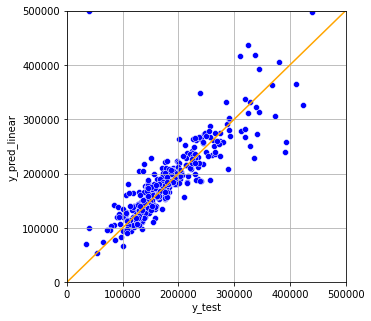

In [13]:
plt.figure(figsize=(5, 5))
sns.scatterplot(y_test[:, 0], y_pred[:, 0], color = 'blue');
plt.plot([0, 500000], [0, 500000], color = 'orange')
plt.xlabel('y_test')
plt.ylabel('y_pred_linear')
plt.xlim(0, 500000)
plt.ylim(0, 500000)
plt.grid()

In [14]:
score['LinearReg'] = RMSE
print (score)

Time['LinearReg'] = t1 - t0
print (Time)

{'LinearReg': 40457.68466432685}
{'LinearReg': 0.037998199462890625}


#### 5.2 Ridge regression

##### For the Ridge method, alpha is a parameter needed to be tuned. I am using the GridSearch method to find the best alpha for this modeling

In [15]:
t0 = time.time()
print(t0)

1624307759.7162483


In [16]:
rr = Ridge()
param = {'alpha': [8, 10, 15]}
rr_cv = GridSearchCV(rr, param, cv=5)
rr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [8, 10, 15]})

In [17]:
t1 = time.time()
print(t1 - t0)

0.06058096885681152


In [18]:
print("Best Score:" + str(rr_cv.best_score_))
print("Best Parameters: " + str(rr_cv.best_params_))

Best Score:0.8529308664519174
Best Parameters: {'alpha': 8}


In [19]:
y_pred = rr_cv.predict(X_test)

R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.8438288901199468
MSE score is 1051776223.6099331
RMSE score is 32431.099636150684


In [20]:
score['ridge'] = RMSE
print (score)

Time['ridge'] = t1 - t0
print (Time)

{'LinearReg': 40457.68466432685, 'ridge': 32431.099636150684}
{'LinearReg': 0.037998199462890625, 'ridge': 0.06058096885681152}


#### 5.3 Lasso regression

In [21]:
t0 = time.time()
print(t0)

1624307759.8385704


In [22]:
lr = Lasso()
param = {'alpha': [50, 100, 200]}  #{'alpha': [600]}     
lr_cv = GridSearchCV(lr, param, cv=5)
lr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [50, 100, 200]})

In [23]:
t1 = time.time()
print(t1 - t0)

0.1528186798095703


##### I tuned the alpha parameter to get the best socre.

In [24]:
print("Best Score:" + str(lr_cv.best_score_))
print("Best Parameters: " + str(lr_cv.best_params_))

Best Score:0.8538935621340885
Best Parameters: {'alpha': 200}


In [25]:
y_pred = lr_cv.predict(X_test)

R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.8441930843384786
MSE score is 1049323459.9706007
RMSE score is 32393.26257064269


In [26]:
score['lasso'] = RMSE
print (score)

Time['lasso'] = t1 - t0
print (Time)

{'LinearReg': 40457.68466432685, 'ridge': 32431.099636150684, 'lasso': 32393.26257064269}
{'LinearReg': 0.037998199462890625, 'ridge': 0.06058096885681152, 'lasso': 0.1528186798095703}


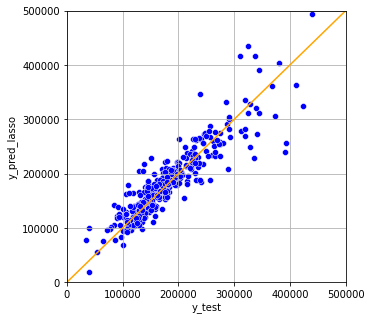

In [27]:
plt.figure(figsize=(5, 5))
sns.scatterplot(y_test[:, 0], y_pred, color = 'blue');
plt.plot([0, 500000], [0, 500000], color = 'orange')
plt.xlabel('y_test')
plt.ylabel('y_pred_lasso')
plt.xlim(0, 500000)
plt.ylim(0, 500000)
plt.grid()

#### From the above plot, we can see the prediction results is pretty good. 

#### 5.4 ElasticNet

In [28]:
t0 = time.time()
print(t0)

1624307760.2719207


In [29]:
en = ElasticNet()
params = {'alpha': [50, 100, 200], 'l1_ratio': [0.8, 1, 1.2]}   #{'alpha': [650, 700, 750], 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]}
en_cv = GridSearchCV(en, params, cv=5)
en_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [50, 100, 200], 'l1_ratio': [0.8, 1, 1.2]})

In [30]:
t1 = time.time()
print(t1 - t0)

1.7866275310516357


In [31]:
print("Best Score:" + str(en_cv.best_score_))
print("Best Parameters: " + str(en_cv.best_params_))

Best Score:0.8538935621340885
Best Parameters: {'alpha': 200, 'l1_ratio': 1}


###### The best l1_ratio is 1. So l2 norm is used for the penalty term. I guess it should be similar as Ridge method. 

In [32]:
y_pred = en_cv.predict(X_test)
R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)

print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.8441930843384786
MSE score is 1049323459.9706007
RMSE score is 32393.26257064269


In [33]:
score['ElasticNet'] = RMSE
print (score)

Time['ElasticNet'] = t1 - t0
print (Time)

{'LinearReg': 40457.68466432685, 'ridge': 32431.099636150684, 'lasso': 32393.26257064269, 'ElasticNet': 32393.26257064269}
{'LinearReg': 0.037998199462890625, 'ridge': 0.06058096885681152, 'lasso': 0.1528186798095703, 'ElasticNet': 1.7866275310516357}


#### 5.5 SVR

In [34]:
t0 = time.time()
print(t0)

1624307762.1224563


In [35]:
svr = SVR()
params = {'C': [450000, 500000, 550000], 'epsilon': [600, 700, 800]}  #{'C': 200000+50000*(1+np.arange(10)), 'epsilon': 200*(1+np.arange(10))}
svr_cv = GridSearchCV(svr, params, cv=5)
svr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [450000, 500000, 550000],
                         'epsilon': [600, 700, 800]})

In [36]:
t1 = time.time()
print(t1 - t0)

7.472355604171753


In [37]:
print("Best Score:" + str(svr_cv.best_score_))
print("Best Parameters: " + str(svr_cv.best_params_))

Best Score:0.761818977474783
Best Parameters: {'C': 450000, 'epsilon': 800}


In [38]:
y_pred = svr_cv.predict(X_test)

R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.7626322433697743
MSE score is 1598616817.585848
RMSE score is 39982.70648150083


In [39]:
score['svr'] = RMSE
print (score)

Time['svr'] = t1 - t0
print (Time)

{'LinearReg': 40457.68466432685, 'ridge': 32431.099636150684, 'lasso': 32393.26257064269, 'ElasticNet': 32393.26257064269, 'svr': 39982.70648150083}
{'LinearReg': 0.037998199462890625, 'ridge': 0.06058096885681152, 'lasso': 0.1528186798095703, 'ElasticNet': 1.7866275310516357, 'svr': 7.472355604171753}


#### 5.6 Random Forest

In [40]:
t0 = time.time()
print(t0)

1624307769.6867337


In [41]:
rfr = RandomForestRegressor()
params = {'n_estimators': [650, 680, 750]} #{'n_estimators': 650+ 10*(1+np.arange(10))}
rfr_cv = GridSearchCV(rfr, params, cv=5)
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [650, 680, 750]})

In [42]:
t1 = time.time()
print(t1 - t0)

56.86420941352844


In [43]:
print("Best Score:" + str(rfr_cv.best_score_))
print("Best Parameters: " + str(rfr_cv.best_params_))

Best Score:0.8419468937433938
Best Parameters: {'n_estimators': 750}


In [44]:
y_pred = rfr_cv.predict(X_test)

R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.8402335523562612
MSE score is 1075989990.0267549
RMSE score is 32802.2863536485


In [45]:
score['random_forest'] = RMSE
print (score)

Time['random_forest'] = t1 - t0
print (Time)

{'LinearReg': 40457.68466432685, 'ridge': 32431.099636150684, 'lasso': 32393.26257064269, 'ElasticNet': 32393.26257064269, 'svr': 39982.70648150083, 'random_forest': 32802.2863536485}
{'LinearReg': 0.037998199462890625, 'ridge': 0.06058096885681152, 'lasso': 0.1528186798095703, 'ElasticNet': 1.7866275310516357, 'svr': 7.472355604171753, 'random_forest': 56.86420941352844}


#### 5.7 XGBoost

In [46]:
t0 = time.time()
print(t0)

1624307826.7017982


In [47]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [10, 20, 50, 100],
        'objective': ['reg:squarederror']
    }
    
    xgb_model = xgboost.XGBRegressor()
    
    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)
    
    gsearch.fit(X_train, y_train)
    
    return gsearch.best_params_ 

#####################################################################################
#Run only in the first run of the kernel.
# hyperParameterTuning(X_train, y_train)

#### Best fit model

In [48]:
xgb_model = xgboost.XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.7,
        learning_rate = 0.1,
        max_depth = 5,
        min_child_weight = 1,
        n_estimators = 100,
        subsample = 0.7)

%time xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)

Wall time: 114 ms


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
y_pred = xgb_model.predict(X_test)

R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.8533667345122682
MSE score is 987541052.5591552
RMSE score is 31425.165911402204


In [50]:
score['xgboost'] = RMSE
print (score)

Time['xgboost'] = t1 - t0
print (Time)

{'LinearReg': 40457.68466432685, 'ridge': 32431.099636150684, 'lasso': 32393.26257064269, 'ElasticNet': 32393.26257064269, 'svr': 39982.70648150083, 'random_forest': 32802.2863536485, 'xgboost': 31425.165911402204}
{'LinearReg': 0.037998199462890625, 'ridge': 0.06058096885681152, 'lasso': 0.1528186798095703, 'ElasticNet': 1.7866275310516357, 'svr': 7.472355604171753, 'random_forest': 56.86420941352844, 'xgboost': -0.15085506439208984}


#### 5.8 XGboost_dmatrix

##### Next we are goign to test another way of using XGBoost. Firstly we need to convert the data to dmatrix by xgboost.DMatrix

In [51]:
# convert the train and test data to dmatrix
train_dmatrix = xgboost.DMatrix(data=X_train, label=y_train)
test_dmatrix = xgboost.DMatrix(data=X_test, label=y_test)

#param = {'booster': 'gblinear', 'objective': 'reg:linear'}
param = {'objective': 'reg:squarederror',
        'booster': 'gblinear'}

xg_score=[]
for i in range(1, 10):
    xgb_r = xgboost.train(params=param, dtrain=train_dmatrix, num_boost_round=i)
    y_pred = xgb_r.predict(test_dmatrix)
    RMSE = mean_squared_error(y_test, y_pred, squared=False)
    xg_score.append(RMSE)    
    
print(xg_score)
    
#print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

[96239.726327056, 56515.928111750596, 39168.630448514676, 34202.94474128912, 32921.62182804772, 32658.96792807718, 32593.31286281551, 32526.051719825693, 32732.041143855567]


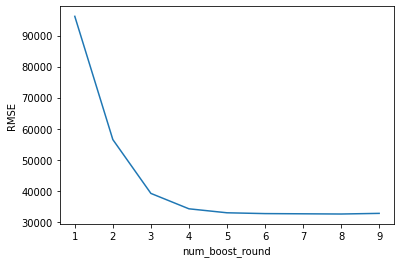

In [52]:
plt.plot(np.arange(1, 10), xg_score)
plt.xlabel('num_boost_round')
plt.ylabel('RMSE')
plt.show()

The best 'num_boost_round' is 5

In [53]:
xgb_r = xgboost.train(params=param, dtrain=train_dmatrix, num_boost_round=6)
y_pred = xgb_r.predict(test_dmatrix)
R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)

print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.8433885523908685
MSE score is 1054741796.1422572
RMSE score is 32476.788574953916


In [54]:
#score['xgboost_dmatrix'] = RMSE
#print (score)

#Time['xgboost_dmatrix'] = t1 - t0
#print (Time)

#### 5.9 LightGBM

In [55]:
#LightGBM hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [5, 10, 15],
        'num_leaves': [32, 48],
        'max_bin': [512],
        'task': ['train'], 
        'boosting_type': ['gbdt'],
        'objective': ['regression'],
        'metric': ['l2', 'auc'],
        'bagging_freq':[10], 
        'bagging_fraction': [0.7],
        'feature_fraction': [0.8],
        'num_iterations': [100000], 
        'n_estimators': [1000]
    }
    
    lgb_model = lgb.LGBMRegressor()
    
    gsearch = GridSearchCV(estimator = lgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)
    
    gsearch.fit(X_train, y_train)
    
    return gsearch.best_params_ 

#####################################################################################
#Run only in the first run of the kernel.
#hyperParameterTuning(X_train, y_train)

#### Best fit model

In [56]:
t0 = time.time()
print(t0)

1624307827.233623


In [57]:
lgb_model = lgb.LGBMRegressor(learning_rate = 0.01,
                              max_depth = 15,
                              num_leaves =32,
                              max_bin = 512,
                              task = 'train',
                              boosting_type = 'gbdt',
                              objective = 'regression',
                              metric = 'l2',
                              bagging_freq = 10,
                              bagging_fraction = 0.7,
                              feature_fraction = 0.8,
                              num_iterations = 100000,
                              n_estimators = 1000)

%time lgb_model.fit(X_train, y_train, early_stopping_rounds=1000, eval_set=[(X_test, y_test)], verbose=False)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
Wall time: 3.35 s


LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, feature_fraction=0.8,
              learning_rate=0.01, max_bin=512, max_depth=15, metric='l2',
              n_estimators=1000, num_iterations=100000, num_leaves=32,
              objective='regression', task='train')

gbm = lgb.LGBMRegressor(**params1)
gbm_cv = GridSearchCV(gbm, params, cv=5)
gbm_cv.fit(X_train, y_train, 
       eval_set=[(X_test, y_test)],
       eval_metric='l1',
       early_stopping_rounds=1000)

In [58]:
t1 = time.time()
print(t1 - t0)

3.401000499725342


In [59]:
y_pred = lgb_model.predict(X_test)

R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)

print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.8318250343763973
MSE score is 1132619409.4745004
RMSE score is 33654.41144151091


In [60]:
score['lightgbm'] = RMSE
print (score)

Time['lightgbm'] = t1 - t0
print (Time)

{'LinearReg': 40457.68466432685, 'ridge': 32431.099636150684, 'lasso': 32393.26257064269, 'ElasticNet': 32393.26257064269, 'svr': 39982.70648150083, 'random_forest': 32802.2863536485, 'xgboost': 31425.165911402204, 'lightgbm': 33654.41144151091}
{'LinearReg': 0.037998199462890625, 'ridge': 0.06058096885681152, 'lasso': 0.1528186798095703, 'ElasticNet': 1.7866275310516357, 'svr': 7.472355604171753, 'random_forest': 56.86420941352844, 'xgboost': -0.15085506439208984, 'lightgbm': 3.401000499725342}


#### 5.10 Catboost

In [61]:
t0 = time.time()
print(t0)

1624307830.7286198


In [62]:
cb = CatBoostRegressor(iterations=3000, depth=5)
params =  {'learning_rate': [0.01]} # {'learning_rate': [0.01, 0.05]}
cb_cv = GridSearchCV(cb, params, cv=5)
cb_cv.fit(X_train, y_train)

0:	learn: 76572.7059039	total: 144ms	remaining: 7m 13s
1:	learn: 76074.7372366	total: 152ms	remaining: 3m 47s
2:	learn: 75594.8254065	total: 157ms	remaining: 2m 37s
3:	learn: 75109.2606718	total: 161ms	remaining: 2m
4:	learn: 74613.4053781	total: 164ms	remaining: 1m 38s
5:	learn: 74162.2157429	total: 167ms	remaining: 1m 23s
6:	learn: 73671.5968445	total: 169ms	remaining: 1m 12s
7:	learn: 73214.8640616	total: 171ms	remaining: 1m 3s
8:	learn: 72798.9272250	total: 173ms	remaining: 57.4s
9:	learn: 72333.9981218	total: 174ms	remaining: 52.1s
10:	learn: 71899.4262299	total: 176ms	remaining: 47.8s
11:	learn: 71469.7553457	total: 178ms	remaining: 44.3s
12:	learn: 71048.5564488	total: 180ms	remaining: 41.3s
13:	learn: 70678.3835036	total: 181ms	remaining: 38.7s
14:	learn: 70235.5949453	total: 183ms	remaining: 36.4s
15:	learn: 69838.0138434	total: 185ms	remaining: 34.5s
16:	learn: 69398.0295724	total: 186ms	remaining: 32.7s
17:	learn: 68994.8588330	total: 188ms	remaining: 31.1s
18:	learn: 68579.

195:	learn: 35027.2513679	total: 444ms	remaining: 6.35s
196:	learn: 34950.1110306	total: 446ms	remaining: 6.34s
197:	learn: 34869.3325888	total: 447ms	remaining: 6.33s
198:	learn: 34793.7433319	total: 449ms	remaining: 6.32s
199:	learn: 34729.5979123	total: 450ms	remaining: 6.3s
200:	learn: 34650.3906243	total: 452ms	remaining: 6.29s
201:	learn: 34579.1371333	total: 453ms	remaining: 6.28s
202:	learn: 34509.8427996	total: 455ms	remaining: 6.26s
203:	learn: 34424.9131409	total: 456ms	remaining: 6.25s
204:	learn: 34357.6664705	total: 457ms	remaining: 6.23s
205:	learn: 34278.4222984	total: 458ms	remaining: 6.21s
206:	learn: 34218.9725008	total: 460ms	remaining: 6.2s
207:	learn: 34165.0644605	total: 461ms	remaining: 6.19s
208:	learn: 34090.8527790	total: 463ms	remaining: 6.18s
209:	learn: 34036.9696832	total: 465ms	remaining: 6.17s
210:	learn: 33979.7436378	total: 466ms	remaining: 6.16s
211:	learn: 33921.6360256	total: 468ms	remaining: 6.15s
212:	learn: 33852.0206396	total: 469ms	remaining: 

382:	learn: 27564.2160443	total: 754ms	remaining: 5.15s
383:	learn: 27543.1914158	total: 771ms	remaining: 5.25s
384:	learn: 27520.4915167	total: 772ms	remaining: 5.25s
385:	learn: 27498.6512860	total: 774ms	remaining: 5.24s
386:	learn: 27478.5833068	total: 775ms	remaining: 5.23s
387:	learn: 27460.4792689	total: 776ms	remaining: 5.23s
388:	learn: 27439.2348497	total: 778ms	remaining: 5.22s
389:	learn: 27425.2096637	total: 780ms	remaining: 5.22s
390:	learn: 27401.4726055	total: 781ms	remaining: 5.21s
391:	learn: 27385.8070624	total: 782ms	remaining: 5.2s
392:	learn: 27375.0164361	total: 785ms	remaining: 5.21s
393:	learn: 27363.5067768	total: 786ms	remaining: 5.2s
394:	learn: 27345.8621074	total: 788ms	remaining: 5.2s
395:	learn: 27320.5504308	total: 789ms	remaining: 5.19s
396:	learn: 27302.6981964	total: 790ms	remaining: 5.18s
397:	learn: 27281.1471269	total: 792ms	remaining: 5.18s
398:	learn: 27275.2046366	total: 794ms	remaining: 5.18s
399:	learn: 27266.1707305	total: 797ms	remaining: 5

584:	learn: 24781.9759524	total: 1.22s	remaining: 5.02s
585:	learn: 24773.8334636	total: 1.22s	remaining: 5.01s
586:	learn: 24755.1657540	total: 1.22s	remaining: 5.02s
587:	learn: 24742.2390807	total: 1.22s	remaining: 5.01s
588:	learn: 24733.1100414	total: 1.22s	remaining: 5.01s
589:	learn: 24725.3145588	total: 1.23s	remaining: 5.01s
590:	learn: 24720.3568126	total: 1.23s	remaining: 5s
591:	learn: 24709.2206233	total: 1.23s	remaining: 5s
592:	learn: 24701.1443354	total: 1.23s	remaining: 5s
593:	learn: 24693.4916534	total: 1.23s	remaining: 4.99s
594:	learn: 24685.1106370	total: 1.23s	remaining: 4.99s
595:	learn: 24675.3440432	total: 1.24s	remaining: 4.99s
596:	learn: 24668.9799941	total: 1.24s	remaining: 4.98s
597:	learn: 24660.9948146	total: 1.24s	remaining: 4.98s
598:	learn: 24650.7861610	total: 1.24s	remaining: 4.97s
599:	learn: 24642.5251286	total: 1.24s	remaining: 4.97s
600:	learn: 24633.2772108	total: 1.25s	remaining: 4.97s
601:	learn: 24623.1458043	total: 1.25s	remaining: 4.97s
6

761:	learn: 23175.6324852	total: 1.52s	remaining: 4.45s
762:	learn: 23165.5949802	total: 1.52s	remaining: 4.45s
763:	learn: 23157.7411194	total: 1.52s	remaining: 4.45s
764:	learn: 23152.4107967	total: 1.52s	remaining: 4.45s
765:	learn: 23145.0669891	total: 1.53s	remaining: 4.45s
766:	learn: 23134.5668699	total: 1.53s	remaining: 4.45s
767:	learn: 23127.3397755	total: 1.53s	remaining: 4.45s
768:	learn: 23116.2771892	total: 1.53s	remaining: 4.45s
769:	learn: 23108.5317509	total: 1.53s	remaining: 4.44s
770:	learn: 23100.5781627	total: 1.54s	remaining: 4.44s
771:	learn: 23092.4627900	total: 1.54s	remaining: 4.44s
772:	learn: 23087.0976442	total: 1.54s	remaining: 4.44s
773:	learn: 23081.3030333	total: 1.54s	remaining: 4.44s
774:	learn: 23073.4343636	total: 1.54s	remaining: 4.43s
775:	learn: 23064.8369456	total: 1.54s	remaining: 4.43s
776:	learn: 23060.8655316	total: 1.55s	remaining: 4.43s
777:	learn: 23055.2831361	total: 1.55s	remaining: 4.42s
778:	learn: 23051.1484649	total: 1.55s	remaining

956:	learn: 21761.0435803	total: 1.98s	remaining: 4.23s
957:	learn: 21750.2521073	total: 1.98s	remaining: 4.22s
958:	learn: 21743.4519512	total: 1.98s	remaining: 4.22s
959:	learn: 21738.4189295	total: 1.99s	remaining: 4.22s
960:	learn: 21727.0980034	total: 1.99s	remaining: 4.22s
961:	learn: 21723.1787516	total: 1.99s	remaining: 4.21s
962:	learn: 21715.8373266	total: 1.99s	remaining: 4.21s
963:	learn: 21710.3972519	total: 1.99s	remaining: 4.21s
964:	learn: 21705.8474124	total: 2s	remaining: 4.21s
965:	learn: 21700.6889810	total: 2s	remaining: 4.21s
966:	learn: 21697.5101264	total: 2s	remaining: 4.2s
967:	learn: 21689.9315777	total: 2s	remaining: 4.2s
968:	learn: 21685.6591757	total: 2s	remaining: 4.2s
969:	learn: 21680.2466680	total: 2.01s	remaining: 4.2s
970:	learn: 21675.0658133	total: 2.01s	remaining: 4.2s
971:	learn: 21663.4421901	total: 2.01s	remaining: 4.19s
972:	learn: 21654.8133551	total: 2.01s	remaining: 4.19s
973:	learn: 21650.6553929	total: 2.01s	remaining: 4.19s
974:	learn: 

1109:	learn: 20813.6005961	total: 2.27s	remaining: 3.88s
1110:	learn: 20806.3269149	total: 2.28s	remaining: 3.87s
1111:	learn: 20803.5531908	total: 2.28s	remaining: 3.87s
1112:	learn: 20796.7983040	total: 2.28s	remaining: 3.87s
1113:	learn: 20795.3273102	total: 2.28s	remaining: 3.87s
1114:	learn: 20789.1329696	total: 2.28s	remaining: 3.86s
1115:	learn: 20780.7987858	total: 2.29s	remaining: 3.86s
1116:	learn: 20778.1702734	total: 2.29s	remaining: 3.86s
1117:	learn: 20771.2291800	total: 2.29s	remaining: 3.85s
1118:	learn: 20767.7695798	total: 2.29s	remaining: 3.85s
1119:	learn: 20764.1738809	total: 2.29s	remaining: 3.85s
1120:	learn: 20756.1215066	total: 2.29s	remaining: 3.85s
1121:	learn: 20749.0658510	total: 2.3s	remaining: 3.84s
1122:	learn: 20745.0493651	total: 2.3s	remaining: 3.84s
1123:	learn: 20735.3904974	total: 2.3s	remaining: 3.84s
1124:	learn: 20728.2313698	total: 2.3s	remaining: 3.84s
1125:	learn: 20722.2249950	total: 2.3s	remaining: 3.83s
1126:	learn: 20718.8222879	total: 2.

1263:	learn: 20102.4796510	total: 2.57s	remaining: 3.53s
1264:	learn: 20099.4530592	total: 2.58s	remaining: 3.53s
1265:	learn: 20092.3879168	total: 2.58s	remaining: 3.53s
1266:	learn: 20091.6438491	total: 2.58s	remaining: 3.53s
1267:	learn: 20090.5007148	total: 2.58s	remaining: 3.53s
1268:	learn: 20089.1722250	total: 2.58s	remaining: 3.52s
1269:	learn: 20084.3063547	total: 2.58s	remaining: 3.52s
1270:	learn: 20083.0352570	total: 2.59s	remaining: 3.52s
1271:	learn: 20082.2345009	total: 2.59s	remaining: 3.52s
1272:	learn: 20079.0263627	total: 2.59s	remaining: 3.52s
1273:	learn: 20073.0331815	total: 2.59s	remaining: 3.51s
1274:	learn: 20065.6818317	total: 2.6s	remaining: 3.51s
1275:	learn: 20061.4754640	total: 2.6s	remaining: 3.51s
1276:	learn: 20056.1429442	total: 2.6s	remaining: 3.51s
1277:	learn: 20049.7302944	total: 2.6s	remaining: 3.51s
1278:	learn: 20043.3891168	total: 2.6s	remaining: 3.5s
1279:	learn: 20039.2754787	total: 2.61s	remaining: 3.5s
1280:	learn: 20038.1904468	total: 2.61

1432:	learn: 19430.5168939	total: 2.88s	remaining: 3.14s
1433:	learn: 19425.6066299	total: 2.88s	remaining: 3.14s
1434:	learn: 19423.4662297	total: 2.88s	remaining: 3.14s
1435:	learn: 19417.1317308	total: 2.88s	remaining: 3.14s
1436:	learn: 19412.4152359	total: 2.88s	remaining: 3.14s
1437:	learn: 19411.4738134	total: 2.89s	remaining: 3.13s
1438:	learn: 19408.2745224	total: 2.89s	remaining: 3.13s
1439:	learn: 19405.1302757	total: 2.89s	remaining: 3.13s
1440:	learn: 19403.0821533	total: 2.89s	remaining: 3.13s
1441:	learn: 19400.9655306	total: 2.89s	remaining: 3.13s
1442:	learn: 19398.4885516	total: 2.9s	remaining: 3.12s
1443:	learn: 19396.0374614	total: 2.9s	remaining: 3.12s
1444:	learn: 19391.4079259	total: 2.9s	remaining: 3.12s
1445:	learn: 19389.8253303	total: 2.9s	remaining: 3.12s
1446:	learn: 19386.2896866	total: 2.91s	remaining: 3.12s
1447:	learn: 19381.5011092	total: 2.91s	remaining: 3.12s
1448:	learn: 19379.5680471	total: 2.91s	remaining: 3.12s
1449:	learn: 19373.3243810	total: 2

1658:	learn: 18579.6630919	total: 3.33s	remaining: 2.69s
1659:	learn: 18573.5108335	total: 3.33s	remaining: 2.69s
1660:	learn: 18571.7820836	total: 3.34s	remaining: 2.69s
1661:	learn: 18570.3638201	total: 3.34s	remaining: 2.69s
1662:	learn: 18569.6057018	total: 3.34s	remaining: 2.68s
1663:	learn: 18566.9969798	total: 3.34s	remaining: 2.68s
1664:	learn: 18561.7161505	total: 3.34s	remaining: 2.68s
1665:	learn: 18560.3261183	total: 3.34s	remaining: 2.68s
1666:	learn: 18558.8710577	total: 3.35s	remaining: 2.67s
1667:	learn: 18553.7240402	total: 3.35s	remaining: 2.67s
1668:	learn: 18547.9002611	total: 3.35s	remaining: 2.67s
1669:	learn: 18546.4833652	total: 3.35s	remaining: 2.67s
1670:	learn: 18542.9654477	total: 3.35s	remaining: 2.67s
1671:	learn: 18540.3740812	total: 3.35s	remaining: 2.66s
1672:	learn: 18536.5273056	total: 3.35s	remaining: 2.66s
1673:	learn: 18534.4724098	total: 3.35s	remaining: 2.66s
1674:	learn: 18530.3122334	total: 3.36s	remaining: 2.66s
1675:	learn: 18528.3645281	tota

1844:	learn: 17930.5775987	total: 3.62s	remaining: 2.27s
1845:	learn: 17927.9377417	total: 3.63s	remaining: 2.27s
1846:	learn: 17924.3152140	total: 3.63s	remaining: 2.26s
1847:	learn: 17920.0780796	total: 3.63s	remaining: 2.26s
1848:	learn: 17919.4134609	total: 3.63s	remaining: 2.26s
1849:	learn: 17914.6596344	total: 3.63s	remaining: 2.26s
1850:	learn: 17912.6129208	total: 3.63s	remaining: 2.25s
1851:	learn: 17910.4414273	total: 3.63s	remaining: 2.25s
1852:	learn: 17909.5590308	total: 3.64s	remaining: 2.25s
1853:	learn: 17906.1638657	total: 3.64s	remaining: 2.25s
1854:	learn: 17904.1327956	total: 3.64s	remaining: 2.25s
1855:	learn: 17897.6876779	total: 3.64s	remaining: 2.24s
1856:	learn: 17893.5637113	total: 3.64s	remaining: 2.24s
1857:	learn: 17888.2840310	total: 3.64s	remaining: 2.24s
1858:	learn: 17886.1799104	total: 3.65s	remaining: 2.24s
1859:	learn: 17883.7628060	total: 3.65s	remaining: 2.23s
1860:	learn: 17878.6247849	total: 3.65s	remaining: 2.23s
1861:	learn: 17875.1230090	tota

2041:	learn: 17332.7872824	total: 3.94s	remaining: 1.85s
2042:	learn: 17328.3774909	total: 3.94s	remaining: 1.84s
2043:	learn: 17324.2517904	total: 3.94s	remaining: 1.84s
2044:	learn: 17320.6585487	total: 3.94s	remaining: 1.84s
2045:	learn: 17318.3798842	total: 3.95s	remaining: 1.84s
2046:	learn: 17314.7739081	total: 3.95s	remaining: 1.84s
2047:	learn: 17309.2393368	total: 3.95s	remaining: 1.84s
2048:	learn: 17307.7586599	total: 3.95s	remaining: 1.83s
2049:	learn: 17304.1791204	total: 3.95s	remaining: 1.83s
2050:	learn: 17299.4825001	total: 3.96s	remaining: 1.83s
2051:	learn: 17297.6068106	total: 3.96s	remaining: 1.83s
2052:	learn: 17296.3379437	total: 3.96s	remaining: 1.83s
2053:	learn: 17294.0813728	total: 3.96s	remaining: 1.82s
2054:	learn: 17291.1000474	total: 3.96s	remaining: 1.82s
2055:	learn: 17286.2736577	total: 3.96s	remaining: 1.82s
2056:	learn: 17282.3290918	total: 3.96s	remaining: 1.82s
2057:	learn: 17275.2004570	total: 3.97s	remaining: 1.81s
2058:	learn: 17272.2637171	tota

2223:	learn: 16811.2070846	total: 4.24s	remaining: 1.48s
2224:	learn: 16807.8543807	total: 4.24s	remaining: 1.48s
2225:	learn: 16806.0584085	total: 4.24s	remaining: 1.48s
2226:	learn: 16799.9267348	total: 4.25s	remaining: 1.47s
2227:	learn: 16795.1720916	total: 4.25s	remaining: 1.47s
2228:	learn: 16793.0046734	total: 4.25s	remaining: 1.47s
2229:	learn: 16790.7203620	total: 4.25s	remaining: 1.47s
2230:	learn: 16788.4482691	total: 4.25s	remaining: 1.47s
2231:	learn: 16783.7398527	total: 4.25s	remaining: 1.46s
2232:	learn: 16782.6684628	total: 4.25s	remaining: 1.46s
2233:	learn: 16781.7738241	total: 4.26s	remaining: 1.46s
2234:	learn: 16779.3656905	total: 4.26s	remaining: 1.46s
2235:	learn: 16777.8211537	total: 4.26s	remaining: 1.46s
2236:	learn: 16775.7896803	total: 4.26s	remaining: 1.45s
2237:	learn: 16774.6356634	total: 4.26s	remaining: 1.45s
2238:	learn: 16771.9073877	total: 4.27s	remaining: 1.45s
2239:	learn: 16770.3446930	total: 4.27s	remaining: 1.45s
2240:	learn: 16767.2090006	tota

2410:	learn: 16292.8296877	total: 4.54s	remaining: 1.11s
2411:	learn: 16290.7616743	total: 4.55s	remaining: 1.11s
2412:	learn: 16287.3445959	total: 4.55s	remaining: 1.11s
2413:	learn: 16286.0264271	total: 4.55s	remaining: 1.1s
2414:	learn: 16283.2520261	total: 4.55s	remaining: 1.1s
2415:	learn: 16281.9841168	total: 4.55s	remaining: 1.1s
2416:	learn: 16279.4108636	total: 4.56s	remaining: 1.1s
2417:	learn: 16275.6890798	total: 4.56s	remaining: 1.1s
2418:	learn: 16274.1310298	total: 4.56s	remaining: 1.09s
2419:	learn: 16271.6408121	total: 4.56s	remaining: 1.09s
2420:	learn: 16267.0681037	total: 4.56s	remaining: 1.09s
2421:	learn: 16262.8923554	total: 4.57s	remaining: 1.09s
2422:	learn: 16261.7291231	total: 4.57s	remaining: 1.09s
2423:	learn: 16258.2130482	total: 4.57s	remaining: 1.08s
2424:	learn: 16257.2178071	total: 4.57s	remaining: 1.08s
2425:	learn: 16255.6563289	total: 4.57s	remaining: 1.08s
2426:	learn: 16254.5185005	total: 4.57s	remaining: 1.08s
2427:	learn: 16249.6195454	total: 4.

2592:	learn: 15854.5247652	total: 4.85s	remaining: 761ms
2593:	learn: 15851.5997527	total: 4.85s	remaining: 759ms
2594:	learn: 15849.5511233	total: 4.85s	remaining: 757ms
2595:	learn: 15845.1936564	total: 4.85s	remaining: 755ms
2596:	learn: 15843.4809862	total: 4.86s	remaining: 753ms
2597:	learn: 15841.5705462	total: 4.86s	remaining: 752ms
2598:	learn: 15838.2533489	total: 4.86s	remaining: 750ms
2599:	learn: 15833.0740489	total: 4.86s	remaining: 748ms
2600:	learn: 15831.1827681	total: 4.86s	remaining: 746ms
2601:	learn: 15829.0238030	total: 4.86s	remaining: 744ms
2602:	learn: 15826.7931805	total: 4.86s	remaining: 742ms
2603:	learn: 15825.0396225	total: 4.87s	remaining: 740ms
2604:	learn: 15822.3588843	total: 4.87s	remaining: 738ms
2605:	learn: 15818.7415702	total: 4.87s	remaining: 736ms
2606:	learn: 15813.8060832	total: 4.87s	remaining: 734ms
2607:	learn: 15809.2613372	total: 4.87s	remaining: 732ms
2608:	learn: 15808.1901398	total: 4.87s	remaining: 730ms
2609:	learn: 15804.3520959	tota

2793:	learn: 15383.8908068	total: 5.15s	remaining: 380ms
2794:	learn: 15381.0497218	total: 5.16s	remaining: 378ms
2795:	learn: 15378.0689776	total: 5.16s	remaining: 376ms
2796:	learn: 15374.4303339	total: 5.16s	remaining: 375ms
2797:	learn: 15369.4247375	total: 5.16s	remaining: 373ms
2798:	learn: 15366.5022087	total: 5.16s	remaining: 371ms
2799:	learn: 15362.6855427	total: 5.17s	remaining: 369ms
2800:	learn: 15361.7894269	total: 5.17s	remaining: 367ms
2801:	learn: 15359.9499865	total: 5.17s	remaining: 365ms
2802:	learn: 15358.5635181	total: 5.17s	remaining: 364ms
2803:	learn: 15355.9532433	total: 5.17s	remaining: 362ms
2804:	learn: 15354.2983428	total: 5.17s	remaining: 360ms
2805:	learn: 15351.3531486	total: 5.18s	remaining: 358ms
2806:	learn: 15349.3936637	total: 5.18s	remaining: 356ms
2807:	learn: 15348.1667557	total: 5.18s	remaining: 354ms
2808:	learn: 15347.1825864	total: 5.18s	remaining: 352ms
2809:	learn: 15342.0768867	total: 5.18s	remaining: 350ms
2810:	learn: 15340.4688758	tota

2941:	learn: 15037.6706989	total: 5.46s	remaining: 108ms
2942:	learn: 15035.5293356	total: 5.46s	remaining: 106ms
2943:	learn: 15031.7891275	total: 5.46s	remaining: 104ms
2944:	learn: 15030.5474763	total: 5.47s	remaining: 102ms
2945:	learn: 15029.8651975	total: 5.47s	remaining: 100ms
2946:	learn: 15028.9569498	total: 5.47s	remaining: 98.4ms
2947:	learn: 15025.5636281	total: 5.47s	remaining: 96.6ms
2948:	learn: 15023.1976720	total: 5.47s	remaining: 94.7ms
2949:	learn: 15018.0081844	total: 5.48s	remaining: 92.9ms
2950:	learn: 15016.7440339	total: 5.48s	remaining: 91ms
2951:	learn: 15015.2014905	total: 5.48s	remaining: 89.2ms
2952:	learn: 15013.2628289	total: 5.49s	remaining: 87.3ms
2953:	learn: 15012.2597695	total: 5.49s	remaining: 85.5ms
2954:	learn: 15011.7718123	total: 5.49s	remaining: 83.6ms
2955:	learn: 15006.6727443	total: 5.49s	remaining: 81.8ms
2956:	learn: 15005.0322203	total: 5.5s	remaining: 79.9ms
2957:	learn: 15001.9049038	total: 5.5s	remaining: 78.1ms
2958:	learn: 14996.6798

136:	learn: 39745.6675790	total: 313ms	remaining: 6.53s
137:	learn: 39653.9672256	total: 315ms	remaining: 6.52s
138:	learn: 39529.3415727	total: 316ms	remaining: 6.51s
139:	learn: 39390.9771735	total: 318ms	remaining: 6.5s
140:	learn: 39260.9042693	total: 319ms	remaining: 6.48s
141:	learn: 39123.3937863	total: 321ms	remaining: 6.46s
142:	learn: 39014.2038301	total: 322ms	remaining: 6.44s
143:	learn: 38904.7803488	total: 324ms	remaining: 6.42s
144:	learn: 38814.1807755	total: 325ms	remaining: 6.41s
145:	learn: 38697.3601529	total: 327ms	remaining: 6.39s
146:	learn: 38600.5378321	total: 328ms	remaining: 6.37s
147:	learn: 38479.6979318	total: 331ms	remaining: 6.37s
148:	learn: 38359.5266475	total: 332ms	remaining: 6.36s
149:	learn: 38255.0524312	total: 334ms	remaining: 6.35s
150:	learn: 38132.3214466	total: 335ms	remaining: 6.33s
151:	learn: 38034.1217958	total: 337ms	remaining: 6.31s
152:	learn: 37926.4254792	total: 338ms	remaining: 6.29s
153:	learn: 37823.6877920	total: 340ms	remaining:

306:	learn: 28879.8483000	total: 617ms	remaining: 5.42s
307:	learn: 28851.7284432	total: 619ms	remaining: 5.41s
308:	learn: 28818.6228094	total: 621ms	remaining: 5.41s
309:	learn: 28794.4019017	total: 623ms	remaining: 5.41s
310:	learn: 28764.4837584	total: 625ms	remaining: 5.41s
311:	learn: 28728.7621862	total: 627ms	remaining: 5.41s
312:	learn: 28702.6884695	total: 629ms	remaining: 5.4s
313:	learn: 28669.9024112	total: 631ms	remaining: 5.4s
314:	learn: 28640.7432174	total: 632ms	remaining: 5.39s
315:	learn: 28603.7026643	total: 634ms	remaining: 5.38s
316:	learn: 28572.0163538	total: 635ms	remaining: 5.38s
317:	learn: 28544.8663063	total: 638ms	remaining: 5.38s
318:	learn: 28521.4699946	total: 640ms	remaining: 5.38s
319:	learn: 28497.3132009	total: 642ms	remaining: 5.37s
320:	learn: 28470.4456343	total: 643ms	remaining: 5.37s
321:	learn: 28440.7720801	total: 645ms	remaining: 5.36s
322:	learn: 28413.9429160	total: 646ms	remaining: 5.36s
323:	learn: 28383.4971935	total: 648ms	remaining: 

455:	learn: 25814.1969086	total: 920ms	remaining: 5.13s
456:	learn: 25797.5965898	total: 923ms	remaining: 5.14s
457:	learn: 25779.4513958	total: 927ms	remaining: 5.14s
458:	learn: 25765.2779187	total: 931ms	remaining: 5.16s
459:	learn: 25748.5973352	total: 937ms	remaining: 5.17s
460:	learn: 25738.0333478	total: 945ms	remaining: 5.21s
461:	learn: 25728.7457533	total: 948ms	remaining: 5.21s
462:	learn: 25712.8915054	total: 953ms	remaining: 5.22s
463:	learn: 25698.9717969	total: 956ms	remaining: 5.22s
464:	learn: 25684.2532767	total: 958ms	remaining: 5.22s
465:	learn: 25669.5725693	total: 961ms	remaining: 5.23s
466:	learn: 25655.0279441	total: 965ms	remaining: 5.23s
467:	learn: 25637.7728201	total: 967ms	remaining: 5.23s
468:	learn: 25627.0407644	total: 969ms	remaining: 5.23s
469:	learn: 25610.3194502	total: 972ms	remaining: 5.23s
470:	learn: 25599.1788990	total: 974ms	remaining: 5.23s
471:	learn: 25585.3524381	total: 978ms	remaining: 5.24s
472:	learn: 25577.1931554	total: 981ms	remaining

666:	learn: 23656.4508979	total: 1.37s	remaining: 4.8s
667:	learn: 23649.1970797	total: 1.37s	remaining: 4.8s
668:	learn: 23641.3048479	total: 1.38s	remaining: 4.79s
669:	learn: 23634.2422001	total: 1.38s	remaining: 4.79s
670:	learn: 23620.9475907	total: 1.38s	remaining: 4.79s
671:	learn: 23614.9555586	total: 1.38s	remaining: 4.78s
672:	learn: 23606.9318333	total: 1.38s	remaining: 4.78s
673:	learn: 23601.8031735	total: 1.38s	remaining: 4.78s
674:	learn: 23595.2600730	total: 1.39s	remaining: 4.77s
675:	learn: 23586.0553721	total: 1.39s	remaining: 4.77s
676:	learn: 23581.1711548	total: 1.39s	remaining: 4.76s
677:	learn: 23573.6569456	total: 1.39s	remaining: 4.76s
678:	learn: 23564.7139208	total: 1.39s	remaining: 4.75s
679:	learn: 23560.8946843	total: 1.39s	remaining: 4.75s
680:	learn: 23552.1581387	total: 1.39s	remaining: 4.75s
681:	learn: 23540.5364832	total: 1.4s	remaining: 4.75s
682:	learn: 23531.7453015	total: 1.4s	remaining: 4.74s
683:	learn: 23522.3208443	total: 1.4s	remaining: 4.7

860:	learn: 22317.6312064	total: 1.68s	remaining: 4.16s
861:	learn: 22312.9987261	total: 1.68s	remaining: 4.16s
862:	learn: 22309.7546765	total: 1.68s	remaining: 4.16s
863:	learn: 22303.0431235	total: 1.68s	remaining: 4.16s
864:	learn: 22297.6097051	total: 1.69s	remaining: 4.16s
865:	learn: 22292.7905816	total: 1.69s	remaining: 4.16s
866:	learn: 22288.4786985	total: 1.69s	remaining: 4.17s
867:	learn: 22277.6445798	total: 1.7s	remaining: 4.17s
868:	learn: 22271.7476446	total: 1.7s	remaining: 4.17s
869:	learn: 22266.6697228	total: 1.7s	remaining: 4.17s
870:	learn: 22261.9510569	total: 1.71s	remaining: 4.17s
871:	learn: 22258.5972290	total: 1.71s	remaining: 4.17s
872:	learn: 22253.5893178	total: 1.71s	remaining: 4.17s
873:	learn: 22243.5628104	total: 1.71s	remaining: 4.17s
874:	learn: 22237.9885148	total: 1.71s	remaining: 4.16s
875:	learn: 22233.6078681	total: 1.72s	remaining: 4.16s
876:	learn: 22228.6915503	total: 1.72s	remaining: 4.16s
877:	learn: 22225.0219850	total: 1.72s	remaining: 4

1079:	learn: 21180.3083789	total: 2.13s	remaining: 3.78s
1080:	learn: 21172.4928454	total: 2.13s	remaining: 3.78s
1081:	learn: 21165.5780433	total: 2.13s	remaining: 3.78s
1082:	learn: 21159.6063578	total: 2.13s	remaining: 3.78s
1083:	learn: 21153.9601258	total: 2.14s	remaining: 3.77s
1084:	learn: 21145.5723064	total: 2.14s	remaining: 3.77s
1085:	learn: 21139.5347691	total: 2.14s	remaining: 3.77s
1086:	learn: 21131.5349848	total: 2.14s	remaining: 3.77s
1087:	learn: 21122.8796198	total: 2.14s	remaining: 3.77s
1088:	learn: 21114.0413060	total: 2.15s	remaining: 3.76s
1089:	learn: 21106.3193493	total: 2.15s	remaining: 3.76s
1090:	learn: 21100.1990336	total: 2.15s	remaining: 3.76s
1091:	learn: 21092.4581235	total: 2.15s	remaining: 3.76s
1092:	learn: 21086.6212944	total: 2.15s	remaining: 3.75s
1093:	learn: 21084.5709339	total: 2.15s	remaining: 3.75s
1094:	learn: 21074.8692799	total: 2.15s	remaining: 3.75s
1095:	learn: 21067.3490441	total: 2.16s	remaining: 3.75s
1096:	learn: 21060.1758604	tota

1266:	learn: 20207.4149857	total: 2.43s	remaining: 3.32s
1267:	learn: 20199.0211161	total: 2.43s	remaining: 3.32s
1268:	learn: 20191.5417854	total: 2.43s	remaining: 3.32s
1269:	learn: 20186.4644553	total: 2.43s	remaining: 3.32s
1270:	learn: 20184.9056198	total: 2.44s	remaining: 3.31s
1271:	learn: 20179.8372630	total: 2.44s	remaining: 3.31s
1272:	learn: 20171.9331222	total: 2.44s	remaining: 3.31s
1273:	learn: 20165.3119748	total: 2.44s	remaining: 3.31s
1274:	learn: 20164.1943640	total: 2.44s	remaining: 3.3s
1275:	learn: 20155.4017796	total: 2.44s	remaining: 3.3s
1276:	learn: 20150.7941178	total: 2.44s	remaining: 3.3s
1277:	learn: 20143.4111359	total: 2.45s	remaining: 3.3s
1278:	learn: 20139.6255454	total: 2.45s	remaining: 3.3s
1279:	learn: 20136.5117402	total: 2.45s	remaining: 3.29s
1280:	learn: 20131.5433708	total: 2.45s	remaining: 3.29s
1281:	learn: 20122.5370241	total: 2.46s	remaining: 3.29s
1282:	learn: 20121.8788737	total: 2.46s	remaining: 3.29s
1283:	learn: 20117.7573561	total: 2.

1449:	learn: 19380.1103882	total: 2.73s	remaining: 2.92s
1450:	learn: 19379.3031430	total: 2.73s	remaining: 2.91s
1451:	learn: 19374.1601075	total: 2.73s	remaining: 2.91s
1452:	learn: 19368.2606022	total: 2.73s	remaining: 2.91s
1453:	learn: 19360.7655794	total: 2.73s	remaining: 2.91s
1454:	learn: 19355.5042253	total: 2.74s	remaining: 2.9s
1455:	learn: 19351.7932408	total: 2.74s	remaining: 2.9s
1456:	learn: 19345.3984332	total: 2.74s	remaining: 2.9s
1457:	learn: 19339.4294688	total: 2.74s	remaining: 2.9s
1458:	learn: 19333.7917816	total: 2.74s	remaining: 2.9s
1459:	learn: 19327.8931512	total: 2.74s	remaining: 2.89s
1460:	learn: 19321.9495892	total: 2.75s	remaining: 2.89s
1461:	learn: 19317.4033652	total: 2.75s	remaining: 2.89s
1462:	learn: 19314.2944998	total: 2.75s	remaining: 2.89s
1463:	learn: 19311.4929353	total: 2.75s	remaining: 2.89s
1464:	learn: 19304.4211460	total: 2.75s	remaining: 2.88s
1465:	learn: 19303.1217479	total: 2.75s	remaining: 2.88s
1466:	learn: 19302.6261050	total: 2.

1638:	learn: 18638.4944005	total: 3.03s	remaining: 2.52s
1639:	learn: 18633.8952657	total: 3.03s	remaining: 2.51s
1640:	learn: 18630.3720166	total: 3.03s	remaining: 2.51s
1641:	learn: 18620.0759050	total: 3.04s	remaining: 2.51s
1642:	learn: 18615.9242639	total: 3.04s	remaining: 2.51s
1643:	learn: 18609.4673852	total: 3.04s	remaining: 2.51s
1644:	learn: 18605.0573943	total: 3.04s	remaining: 2.5s
1645:	learn: 18599.8425570	total: 3.04s	remaining: 2.5s
1646:	learn: 18592.6878507	total: 3.04s	remaining: 2.5s
1647:	learn: 18589.0217087	total: 3.04s	remaining: 2.5s
1648:	learn: 18586.6575790	total: 3.04s	remaining: 2.5s
1649:	learn: 18581.1296654	total: 3.05s	remaining: 2.49s
1650:	learn: 18580.4536195	total: 3.05s	remaining: 2.49s
1651:	learn: 18578.5979267	total: 3.05s	remaining: 2.49s
1652:	learn: 18575.0221097	total: 3.05s	remaining: 2.49s
1653:	learn: 18566.9643011	total: 3.05s	remaining: 2.48s
1654:	learn: 18562.4316746	total: 3.06s	remaining: 2.48s
1655:	learn: 18561.5998569	total: 3.

1831:	learn: 17875.8293780	total: 3.33s	remaining: 2.13s
1832:	learn: 17873.9445977	total: 3.33s	remaining: 2.12s
1833:	learn: 17868.1268439	total: 3.34s	remaining: 2.12s
1834:	learn: 17866.9529069	total: 3.34s	remaining: 2.12s
1835:	learn: 17862.8242949	total: 3.34s	remaining: 2.12s
1836:	learn: 17857.4848750	total: 3.34s	remaining: 2.12s
1837:	learn: 17855.2823192	total: 3.34s	remaining: 2.11s
1838:	learn: 17849.5860244	total: 3.35s	remaining: 2.11s
1839:	learn: 17845.6140058	total: 3.35s	remaining: 2.11s
1840:	learn: 17841.1158700	total: 3.35s	remaining: 2.11s
1841:	learn: 17836.3363309	total: 3.35s	remaining: 2.11s
1842:	learn: 17832.4707515	total: 3.35s	remaining: 2.1s
1843:	learn: 17831.5640949	total: 3.35s	remaining: 2.1s
1844:	learn: 17825.6757760	total: 3.36s	remaining: 2.1s
1845:	learn: 17819.2073509	total: 3.36s	remaining: 2.1s
1846:	learn: 17817.8377192	total: 3.36s	remaining: 2.1s
1847:	learn: 17814.7157848	total: 3.36s	remaining: 2.1s
1848:	learn: 17810.7928265	total: 3.3

2039:	learn: 17139.8766666	total: 3.64s	remaining: 1.71s
2040:	learn: 17135.3151014	total: 3.64s	remaining: 1.71s
2041:	learn: 17132.7954435	total: 3.64s	remaining: 1.71s
2042:	learn: 17128.2220514	total: 3.64s	remaining: 1.71s
2043:	learn: 17122.5617235	total: 3.64s	remaining: 1.7s
2044:	learn: 17118.0682581	total: 3.65s	remaining: 1.7s
2045:	learn: 17112.2915440	total: 3.65s	remaining: 1.7s
2046:	learn: 17107.4362181	total: 3.65s	remaining: 1.7s
2047:	learn: 17104.3456617	total: 3.65s	remaining: 1.7s
2048:	learn: 17097.5295598	total: 3.65s	remaining: 1.7s
2049:	learn: 17093.3412550	total: 3.65s	remaining: 1.69s
2050:	learn: 17090.5920083	total: 3.65s	remaining: 1.69s
2051:	learn: 17086.9597272	total: 3.66s	remaining: 1.69s
2052:	learn: 17083.6129566	total: 3.66s	remaining: 1.69s
2053:	learn: 17081.6637741	total: 3.66s	remaining: 1.69s
2054:	learn: 17078.6067777	total: 3.66s	remaining: 1.68s
2055:	learn: 17073.2186065	total: 3.66s	remaining: 1.68s
2056:	learn: 17072.7875570	total: 3.6

2253:	learn: 16452.8334616	total: 3.95s	remaining: 1.31s
2254:	learn: 16451.5721156	total: 3.95s	remaining: 1.3s
2255:	learn: 16450.9636817	total: 3.95s	remaining: 1.3s
2256:	learn: 16447.5374538	total: 3.95s	remaining: 1.3s
2257:	learn: 16447.1979129	total: 3.95s	remaining: 1.3s
2258:	learn: 16442.9414552	total: 3.95s	remaining: 1.3s
2259:	learn: 16439.9982073	total: 3.96s	remaining: 1.29s
2260:	learn: 16434.8813161	total: 3.96s	remaining: 1.29s
2261:	learn: 16432.5860800	total: 3.96s	remaining: 1.29s
2262:	learn: 16431.6002397	total: 3.96s	remaining: 1.29s
2263:	learn: 16427.3530290	total: 3.96s	remaining: 1.29s
2264:	learn: 16427.0831516	total: 3.96s	remaining: 1.29s
2265:	learn: 16422.6967705	total: 3.96s	remaining: 1.28s
2266:	learn: 16422.4645433	total: 3.96s	remaining: 1.28s
2267:	learn: 16420.5637294	total: 3.97s	remaining: 1.28s
2268:	learn: 16414.6184174	total: 3.97s	remaining: 1.28s
2269:	learn: 16410.2830776	total: 3.97s	remaining: 1.28s
2270:	learn: 16407.3939950	total: 3.

2474:	learn: 15784.6022368	total: 4.25s	remaining: 903ms
2475:	learn: 15781.6529712	total: 4.26s	remaining: 901ms
2476:	learn: 15777.5823837	total: 4.26s	remaining: 899ms
2477:	learn: 15775.0639637	total: 4.26s	remaining: 897ms
2478:	learn: 15768.6831265	total: 4.26s	remaining: 895ms
2479:	learn: 15768.1563907	total: 4.26s	remaining: 894ms
2480:	learn: 15764.3023008	total: 4.26s	remaining: 892ms
2481:	learn: 15764.1122296	total: 4.26s	remaining: 890ms
2482:	learn: 15760.2062051	total: 4.27s	remaining: 888ms
2483:	learn: 15756.5149220	total: 4.27s	remaining: 887ms
2484:	learn: 15752.8720701	total: 4.27s	remaining: 885ms
2485:	learn: 15751.1411032	total: 4.27s	remaining: 883ms
2486:	learn: 15745.2272213	total: 4.27s	remaining: 881ms
2487:	learn: 15741.8515369	total: 4.27s	remaining: 880ms
2488:	learn: 15739.8280079	total: 4.28s	remaining: 878ms
2489:	learn: 15734.8678498	total: 4.28s	remaining: 876ms
2490:	learn: 15732.6601093	total: 4.28s	remaining: 874ms
2491:	learn: 15730.6693528	tota

2697:	learn: 15195.5000581	total: 4.56s	remaining: 511ms
2698:	learn: 15193.9998950	total: 4.56s	remaining: 509ms
2699:	learn: 15191.2396576	total: 4.56s	remaining: 507ms
2700:	learn: 15185.6092369	total: 4.57s	remaining: 505ms
2701:	learn: 15181.3317572	total: 4.57s	remaining: 504ms
2702:	learn: 15178.6051638	total: 4.57s	remaining: 502ms
2703:	learn: 15176.1746066	total: 4.57s	remaining: 500ms
2704:	learn: 15172.8318656	total: 4.57s	remaining: 499ms
2705:	learn: 15171.1085274	total: 4.57s	remaining: 497ms
2706:	learn: 15168.6379580	total: 4.57s	remaining: 495ms
2707:	learn: 15165.0175077	total: 4.58s	remaining: 493ms
2708:	learn: 15164.8347158	total: 4.58s	remaining: 492ms
2709:	learn: 15163.0523717	total: 4.58s	remaining: 490ms
2710:	learn: 15161.3177697	total: 4.58s	remaining: 488ms
2711:	learn: 15155.8012979	total: 4.58s	remaining: 487ms
2712:	learn: 15152.2172199	total: 4.58s	remaining: 485ms
2713:	learn: 15147.1132984	total: 4.58s	remaining: 483ms
2714:	learn: 15145.8486287	tota

2918:	learn: 14655.2760702	total: 4.87s	remaining: 135ms
2919:	learn: 14653.7745959	total: 4.87s	remaining: 133ms
2920:	learn: 14650.4002990	total: 4.87s	remaining: 132ms
2921:	learn: 14648.5991417	total: 4.87s	remaining: 130ms
2922:	learn: 14644.7446040	total: 4.87s	remaining: 128ms
2923:	learn: 14642.0091896	total: 4.88s	remaining: 127ms
2924:	learn: 14639.5894451	total: 4.88s	remaining: 125ms
2925:	learn: 14636.6710684	total: 4.88s	remaining: 123ms
2926:	learn: 14633.3912272	total: 4.88s	remaining: 122ms
2927:	learn: 14630.1083723	total: 4.88s	remaining: 120ms
2928:	learn: 14628.2018714	total: 4.88s	remaining: 118ms
2929:	learn: 14625.9676881	total: 4.88s	remaining: 117ms
2930:	learn: 14624.0272141	total: 4.89s	remaining: 115ms
2931:	learn: 14623.8654496	total: 4.89s	remaining: 113ms
2932:	learn: 14620.8659035	total: 4.89s	remaining: 112ms
2933:	learn: 14619.4447661	total: 4.89s	remaining: 110ms
2934:	learn: 14616.1138556	total: 4.89s	remaining: 108ms
2935:	learn: 14613.9631412	tota

133:	learn: 40473.2523176	total: 304ms	remaining: 6.5s
134:	learn: 40335.7477199	total: 305ms	remaining: 6.48s
135:	learn: 40208.4156913	total: 307ms	remaining: 6.47s
136:	learn: 40085.6061386	total: 309ms	remaining: 6.46s
137:	learn: 39973.8788542	total: 311ms	remaining: 6.45s
138:	learn: 39833.5276882	total: 313ms	remaining: 6.45s
139:	learn: 39712.1392924	total: 315ms	remaining: 6.44s
140:	learn: 39586.8341733	total: 317ms	remaining: 6.42s
141:	learn: 39473.2966016	total: 318ms	remaining: 6.41s
142:	learn: 39358.6831735	total: 320ms	remaining: 6.39s
143:	learn: 39252.4518883	total: 322ms	remaining: 6.38s
144:	learn: 39149.8058044	total: 323ms	remaining: 6.36s
145:	learn: 39031.4138705	total: 326ms	remaining: 6.36s
146:	learn: 38942.6304886	total: 328ms	remaining: 6.36s
147:	learn: 38837.2185753	total: 330ms	remaining: 6.35s
148:	learn: 38718.6198413	total: 332ms	remaining: 6.35s
149:	learn: 38616.9065596	total: 333ms	remaining: 6.33s
150:	learn: 38516.4958696	total: 335ms	remaining:

296:	learn: 29378.5079548	total: 608ms	remaining: 5.53s
297:	learn: 29365.2307370	total: 610ms	remaining: 5.53s
298:	learn: 29328.6689803	total: 612ms	remaining: 5.53s
299:	learn: 29288.1315034	total: 614ms	remaining: 5.52s
300:	learn: 29250.4168629	total: 615ms	remaining: 5.52s
301:	learn: 29218.6028888	total: 618ms	remaining: 5.52s
302:	learn: 29183.6901512	total: 619ms	remaining: 5.51s
303:	learn: 29145.9254985	total: 621ms	remaining: 5.51s
304:	learn: 29108.9146561	total: 623ms	remaining: 5.5s
305:	learn: 29075.2131692	total: 627ms	remaining: 5.52s
306:	learn: 29037.9122939	total: 629ms	remaining: 5.51s
307:	learn: 29003.4408325	total: 630ms	remaining: 5.51s
308:	learn: 28970.1169484	total: 633ms	remaining: 5.51s
309:	learn: 28930.9778663	total: 634ms	remaining: 5.5s
310:	learn: 28889.3780422	total: 637ms	remaining: 5.5s
311:	learn: 28853.3945862	total: 639ms	remaining: 5.5s
312:	learn: 28818.8976269	total: 641ms	remaining: 5.5s
313:	learn: 28777.9221127	total: 643ms	remaining: 5.5

458:	learn: 25605.7106515	total: 912ms	remaining: 5.05s
459:	learn: 25589.6055003	total: 914ms	remaining: 5.05s
460:	learn: 25574.5824450	total: 931ms	remaining: 5.13s
461:	learn: 25559.0012168	total: 932ms	remaining: 5.12s
462:	learn: 25547.9297932	total: 934ms	remaining: 5.12s
463:	learn: 25534.4745663	total: 935ms	remaining: 5.11s
464:	learn: 25518.0701276	total: 938ms	remaining: 5.11s
465:	learn: 25499.1079653	total: 939ms	remaining: 5.11s
466:	learn: 25489.2128434	total: 941ms	remaining: 5.1s
467:	learn: 25477.2887950	total: 943ms	remaining: 5.1s
468:	learn: 25464.0891078	total: 945ms	remaining: 5.1s
469:	learn: 25450.5492228	total: 946ms	remaining: 5.09s
470:	learn: 25437.3256820	total: 948ms	remaining: 5.09s
471:	learn: 25421.4132176	total: 950ms	remaining: 5.09s
472:	learn: 25409.1598576	total: 953ms	remaining: 5.09s
473:	learn: 25393.2096175	total: 955ms	remaining: 5.09s
474:	learn: 25379.9707575	total: 957ms	remaining: 5.09s
475:	learn: 25367.1559145	total: 959ms	remaining: 5

641:	learn: 23543.5486354	total: 1.22s	remaining: 4.47s
642:	learn: 23532.1534331	total: 1.22s	remaining: 4.47s
643:	learn: 23520.5185415	total: 1.22s	remaining: 4.47s
644:	learn: 23511.5882256	total: 1.22s	remaining: 4.46s
645:	learn: 23506.0140930	total: 1.22s	remaining: 4.46s
646:	learn: 23493.6844381	total: 1.23s	remaining: 4.46s
647:	learn: 23480.9968999	total: 1.23s	remaining: 4.45s
648:	learn: 23472.7260034	total: 1.23s	remaining: 4.45s
649:	learn: 23468.2853975	total: 1.23s	remaining: 4.45s
650:	learn: 23461.8145011	total: 1.23s	remaining: 4.44s
651:	learn: 23455.3892720	total: 1.23s	remaining: 4.44s
652:	learn: 23447.7593916	total: 1.23s	remaining: 4.43s
653:	learn: 23438.5308912	total: 1.24s	remaining: 4.43s
654:	learn: 23428.4240354	total: 1.24s	remaining: 4.43s
655:	learn: 23417.7680795	total: 1.24s	remaining: 4.42s
656:	learn: 23407.4065605	total: 1.24s	remaining: 4.42s
657:	learn: 23397.0946170	total: 1.24s	remaining: 4.42s
658:	learn: 23389.0812734	total: 1.24s	remaining

853:	learn: 21909.1780670	total: 1.52s	remaining: 3.83s
854:	learn: 21902.6060241	total: 1.52s	remaining: 3.83s
855:	learn: 21901.6522475	total: 1.53s	remaining: 3.82s
856:	learn: 21899.2620793	total: 1.53s	remaining: 3.82s
857:	learn: 21890.2727549	total: 1.53s	remaining: 3.82s
858:	learn: 21884.5095575	total: 1.53s	remaining: 3.81s
859:	learn: 21882.6091356	total: 1.53s	remaining: 3.81s
860:	learn: 21878.0426334	total: 1.53s	remaining: 3.81s
861:	learn: 21872.9266418	total: 1.54s	remaining: 3.81s
862:	learn: 21868.5234921	total: 1.54s	remaining: 3.81s
863:	learn: 21861.5414519	total: 1.54s	remaining: 3.81s
864:	learn: 21854.5329988	total: 1.54s	remaining: 3.81s
865:	learn: 21849.3191136	total: 1.55s	remaining: 3.81s
866:	learn: 21844.7863013	total: 1.55s	remaining: 3.81s
867:	learn: 21841.0460528	total: 1.55s	remaining: 3.81s
868:	learn: 21834.7056234	total: 1.55s	remaining: 3.81s
869:	learn: 21830.4126013	total: 1.55s	remaining: 3.81s
870:	learn: 21827.4116273	total: 1.56s	remaining

1001:	learn: 21129.0386765	total: 1.82s	remaining: 3.64s
1002:	learn: 21124.6560168	total: 1.82s	remaining: 3.63s
1003:	learn: 21119.9546362	total: 1.83s	remaining: 3.63s
1004:	learn: 21116.6994868	total: 1.83s	remaining: 3.63s
1005:	learn: 21115.0855200	total: 1.83s	remaining: 3.63s
1006:	learn: 21110.7714329	total: 1.83s	remaining: 3.63s
1007:	learn: 21109.8345065	total: 1.83s	remaining: 3.62s
1008:	learn: 21106.3417389	total: 1.83s	remaining: 3.62s
1009:	learn: 21098.0966933	total: 1.84s	remaining: 3.62s
1010:	learn: 21084.7519296	total: 1.84s	remaining: 3.62s
1011:	learn: 21082.5491310	total: 1.84s	remaining: 3.61s
1012:	learn: 21076.2562756	total: 1.84s	remaining: 3.61s
1013:	learn: 21063.7619594	total: 1.84s	remaining: 3.61s
1014:	learn: 21063.1089610	total: 1.84s	remaining: 3.61s
1015:	learn: 21057.6611603	total: 1.85s	remaining: 3.61s
1016:	learn: 21053.5355248	total: 1.85s	remaining: 3.6s
1017:	learn: 21045.0008942	total: 1.85s	remaining: 3.6s
1018:	learn: 21040.6170442	total:

1213:	learn: 20024.2661167	total: 2.13s	remaining: 3.13s
1214:	learn: 20019.7643754	total: 2.13s	remaining: 3.13s
1215:	learn: 20018.9053436	total: 2.13s	remaining: 3.13s
1216:	learn: 20011.4672191	total: 2.13s	remaining: 3.12s
1217:	learn: 20010.6990197	total: 2.13s	remaining: 3.12s
1218:	learn: 20001.2191059	total: 2.13s	remaining: 3.12s
1219:	learn: 19992.7089063	total: 2.14s	remaining: 3.12s
1220:	learn: 19986.6399616	total: 2.14s	remaining: 3.11s
1221:	learn: 19973.8038005	total: 2.14s	remaining: 3.11s
1222:	learn: 19969.8115936	total: 2.14s	remaining: 3.11s
1223:	learn: 19963.9145386	total: 2.14s	remaining: 3.11s
1224:	learn: 19954.1111813	total: 2.14s	remaining: 3.11s
1225:	learn: 19946.2560355	total: 2.15s	remaining: 3.1s
1226:	learn: 19942.3246318	total: 2.15s	remaining: 3.1s
1227:	learn: 19941.5302525	total: 2.15s	remaining: 3.1s
1228:	learn: 19940.6923205	total: 2.15s	remaining: 3.1s
1229:	learn: 19935.2017623	total: 2.15s	remaining: 3.09s
1230:	learn: 19926.2054380	total: 2

1430:	learn: 18928.4037390	total: 2.43s	remaining: 2.67s
1431:	learn: 18920.2850932	total: 2.43s	remaining: 2.66s
1432:	learn: 18918.8365635	total: 2.43s	remaining: 2.66s
1433:	learn: 18914.8515995	total: 2.44s	remaining: 2.66s
1434:	learn: 18908.8561287	total: 2.44s	remaining: 2.66s
1435:	learn: 18904.8246984	total: 2.44s	remaining: 2.66s
1436:	learn: 18904.0606804	total: 2.44s	remaining: 2.65s
1437:	learn: 18895.8657911	total: 2.44s	remaining: 2.65s
1438:	learn: 18889.4361416	total: 2.44s	remaining: 2.65s
1439:	learn: 18888.1392453	total: 2.44s	remaining: 2.65s
1440:	learn: 18880.8636837	total: 2.45s	remaining: 2.65s
1441:	learn: 18879.1796043	total: 2.45s	remaining: 2.64s
1442:	learn: 18874.6457228	total: 2.45s	remaining: 2.64s
1443:	learn: 18868.6093664	total: 2.45s	remaining: 2.64s
1444:	learn: 18865.5865987	total: 2.45s	remaining: 2.64s
1445:	learn: 18858.6505568	total: 2.45s	remaining: 2.64s
1446:	learn: 18854.0485129	total: 2.45s	remaining: 2.63s
1447:	learn: 18844.2323829	tota

1641:	learn: 18016.2065451	total: 2.73s	remaining: 2.26s
1642:	learn: 18011.9907500	total: 2.73s	remaining: 2.26s
1643:	learn: 18009.7474800	total: 2.74s	remaining: 2.26s
1644:	learn: 18004.4406833	total: 2.74s	remaining: 2.26s
1645:	learn: 18000.0969513	total: 2.74s	remaining: 2.25s
1646:	learn: 17993.3819871	total: 2.74s	remaining: 2.25s
1647:	learn: 17989.4692078	total: 2.74s	remaining: 2.25s
1648:	learn: 17986.7691911	total: 2.74s	remaining: 2.25s
1649:	learn: 17981.7544276	total: 2.75s	remaining: 2.25s
1650:	learn: 17976.1404127	total: 2.75s	remaining: 2.24s
1651:	learn: 17972.3121812	total: 2.75s	remaining: 2.24s
1652:	learn: 17968.7866018	total: 2.75s	remaining: 2.24s
1653:	learn: 17963.8499051	total: 2.75s	remaining: 2.24s
1654:	learn: 17960.9716810	total: 2.75s	remaining: 2.24s
1655:	learn: 17956.3570686	total: 2.75s	remaining: 2.23s
1656:	learn: 17953.8058236	total: 2.75s	remaining: 2.23s
1657:	learn: 17952.3128186	total: 2.76s	remaining: 2.23s
1658:	learn: 17946.3615139	tota

1848:	learn: 17251.4726346	total: 3.04s	remaining: 1.89s
1849:	learn: 17250.2907998	total: 3.04s	remaining: 1.89s
1850:	learn: 17245.7667674	total: 3.04s	remaining: 1.89s
1851:	learn: 17239.2494988	total: 3.04s	remaining: 1.88s
1852:	learn: 17235.5187827	total: 3.04s	remaining: 1.88s
1853:	learn: 17229.8315975	total: 3.04s	remaining: 1.88s
1854:	learn: 17224.7612255	total: 3.05s	remaining: 1.88s
1855:	learn: 17220.2171822	total: 3.05s	remaining: 1.88s
1856:	learn: 17216.1088593	total: 3.05s	remaining: 1.88s
1857:	learn: 17213.8354927	total: 3.05s	remaining: 1.88s
1858:	learn: 17210.6342475	total: 3.05s	remaining: 1.87s
1859:	learn: 17209.4843056	total: 3.06s	remaining: 1.87s
1860:	learn: 17206.3590010	total: 3.06s	remaining: 1.87s
1861:	learn: 17201.5036412	total: 3.06s	remaining: 1.87s
1862:	learn: 17196.3327270	total: 3.06s	remaining: 1.87s
1863:	learn: 17191.2715924	total: 3.06s	remaining: 1.87s
1864:	learn: 17187.4253111	total: 3.06s	remaining: 1.86s
1865:	learn: 17182.8553516	tota

2039:	learn: 16608.7252548	total: 3.34s	remaining: 1.57s
2040:	learn: 16604.5786158	total: 3.34s	remaining: 1.57s
2041:	learn: 16597.7613376	total: 3.35s	remaining: 1.57s
2042:	learn: 16597.5103417	total: 3.35s	remaining: 1.57s
2043:	learn: 16594.5228554	total: 3.35s	remaining: 1.56s
2044:	learn: 16589.6286883	total: 3.35s	remaining: 1.56s
2045:	learn: 16584.2266780	total: 3.35s	remaining: 1.56s
2046:	learn: 16582.2958543	total: 3.35s	remaining: 1.56s
2047:	learn: 16579.5733097	total: 3.35s	remaining: 1.56s
2048:	learn: 16574.5058254	total: 3.35s	remaining: 1.56s
2049:	learn: 16572.8199331	total: 3.36s	remaining: 1.55s
2050:	learn: 16570.1731248	total: 3.36s	remaining: 1.55s
2051:	learn: 16566.7799906	total: 3.36s	remaining: 1.55s
2052:	learn: 16562.7106877	total: 3.36s	remaining: 1.55s
2053:	learn: 16559.3065220	total: 3.36s	remaining: 1.55s
2054:	learn: 16558.5005664	total: 3.36s	remaining: 1.55s
2055:	learn: 16556.1620032	total: 3.37s	remaining: 1.54s
2056:	learn: 16554.9718048	tota

2221:	learn: 16061.6190674	total: 3.64s	remaining: 1.27s
2222:	learn: 16060.1936767	total: 3.65s	remaining: 1.27s
2223:	learn: 16057.7708474	total: 3.65s	remaining: 1.27s
2224:	learn: 16053.7515374	total: 3.65s	remaining: 1.27s
2225:	learn: 16050.6433043	total: 3.65s	remaining: 1.27s
2226:	learn: 16049.5147163	total: 3.65s	remaining: 1.27s
2227:	learn: 16048.1962531	total: 3.65s	remaining: 1.27s
2228:	learn: 16047.1603453	total: 3.66s	remaining: 1.26s
2229:	learn: 16046.6585178	total: 3.66s	remaining: 1.26s
2230:	learn: 16042.9050411	total: 3.66s	remaining: 1.26s
2231:	learn: 16041.3808080	total: 3.66s	remaining: 1.26s
2232:	learn: 16038.2126199	total: 3.66s	remaining: 1.26s
2233:	learn: 16037.9015716	total: 3.66s	remaining: 1.26s
2234:	learn: 16034.8897977	total: 3.67s	remaining: 1.25s
2235:	learn: 16030.2052668	total: 3.67s	remaining: 1.25s
2236:	learn: 16028.5123282	total: 3.67s	remaining: 1.25s
2237:	learn: 16024.9163219	total: 3.67s	remaining: 1.25s
2238:	learn: 16019.9249115	tota

2400:	learn: 15577.4842814	total: 3.94s	remaining: 984ms
2401:	learn: 15573.7906942	total: 3.94s	remaining: 982ms
2402:	learn: 15572.2466043	total: 3.95s	remaining: 981ms
2403:	learn: 15567.7471855	total: 3.95s	remaining: 979ms
2404:	learn: 15566.7083316	total: 3.95s	remaining: 977ms
2405:	learn: 15562.2123276	total: 3.95s	remaining: 976ms
2406:	learn: 15559.3341801	total: 3.95s	remaining: 974ms
2407:	learn: 15555.5198471	total: 3.96s	remaining: 972ms
2408:	learn: 15551.8782425	total: 3.96s	remaining: 971ms
2409:	learn: 15549.8497038	total: 3.96s	remaining: 969ms
2410:	learn: 15548.9752870	total: 3.96s	remaining: 968ms
2411:	learn: 15546.1156284	total: 3.96s	remaining: 966ms
2412:	learn: 15543.5918101	total: 3.96s	remaining: 964ms
2413:	learn: 15540.8941593	total: 3.96s	remaining: 963ms
2414:	learn: 15537.8446235	total: 3.97s	remaining: 961ms
2415:	learn: 15533.2275320	total: 3.97s	remaining: 960ms
2416:	learn: 15532.7005219	total: 3.97s	remaining: 958ms
2417:	learn: 15529.5023753	tota

2580:	learn: 15106.1067409	total: 4.25s	remaining: 689ms
2581:	learn: 15105.1039385	total: 4.25s	remaining: 688ms
2582:	learn: 15100.8618772	total: 4.25s	remaining: 686ms
2583:	learn: 15098.5869558	total: 4.25s	remaining: 684ms
2584:	learn: 15096.6225953	total: 4.25s	remaining: 683ms
2585:	learn: 15094.3174000	total: 4.25s	remaining: 681ms
2586:	learn: 15093.3921640	total: 4.25s	remaining: 679ms
2587:	learn: 15090.8131256	total: 4.26s	remaining: 678ms
2588:	learn: 15086.4757659	total: 4.26s	remaining: 676ms
2589:	learn: 15085.0214206	total: 4.26s	remaining: 674ms
2590:	learn: 15081.9183340	total: 4.26s	remaining: 673ms
2591:	learn: 15078.5716109	total: 4.26s	remaining: 671ms
2592:	learn: 15076.9566144	total: 4.26s	remaining: 670ms
2593:	learn: 15073.2289938	total: 4.27s	remaining: 668ms
2594:	learn: 15071.2361073	total: 4.27s	remaining: 666ms
2595:	learn: 15066.5623469	total: 4.27s	remaining: 665ms
2596:	learn: 15062.0903335	total: 4.27s	remaining: 663ms
2597:	learn: 15060.3290539	tota

2776:	learn: 14603.0463200	total: 4.55s	remaining: 365ms
2777:	learn: 14601.7431670	total: 4.55s	remaining: 364ms
2778:	learn: 14601.2485521	total: 4.55s	remaining: 362ms
2779:	learn: 14596.4643579	total: 4.55s	remaining: 360ms
2780:	learn: 14594.8626244	total: 4.55s	remaining: 359ms
2781:	learn: 14592.5450919	total: 4.56s	remaining: 357ms
2782:	learn: 14588.7135452	total: 4.56s	remaining: 355ms
2783:	learn: 14587.2595510	total: 4.56s	remaining: 354ms
2784:	learn: 14584.1193410	total: 4.56s	remaining: 352ms
2785:	learn: 14581.0033498	total: 4.57s	remaining: 351ms
2786:	learn: 14576.6067380	total: 4.57s	remaining: 349ms
2787:	learn: 14574.7889792	total: 4.57s	remaining: 347ms
2788:	learn: 14572.2364051	total: 4.57s	remaining: 346ms
2789:	learn: 14568.8693373	total: 4.57s	remaining: 344ms
2790:	learn: 14567.6625640	total: 4.57s	remaining: 342ms
2791:	learn: 14566.2511837	total: 4.58s	remaining: 341ms
2792:	learn: 14564.8932587	total: 4.58s	remaining: 339ms
2793:	learn: 14562.3011573	tota

2953:	learn: 14224.0125882	total: 4.85s	remaining: 75.5ms
2954:	learn: 14222.6083324	total: 4.85s	remaining: 73.9ms
2955:	learn: 14221.9379040	total: 4.85s	remaining: 72.3ms
2956:	learn: 14219.8512921	total: 4.86s	remaining: 70.6ms
2957:	learn: 14219.4229515	total: 4.86s	remaining: 69ms
2958:	learn: 14216.0271953	total: 4.86s	remaining: 67.3ms
2959:	learn: 14212.3886993	total: 4.86s	remaining: 65.7ms
2960:	learn: 14208.4919467	total: 4.86s	remaining: 64.1ms
2961:	learn: 14208.0176172	total: 4.86s	remaining: 62.4ms
2962:	learn: 14205.1290426	total: 4.87s	remaining: 60.8ms
2963:	learn: 14201.6047133	total: 4.87s	remaining: 59.1ms
2964:	learn: 14197.2385260	total: 4.87s	remaining: 57.5ms
2965:	learn: 14193.5808588	total: 4.87s	remaining: 55.9ms
2966:	learn: 14192.6389526	total: 4.87s	remaining: 54.2ms
2967:	learn: 14191.5014240	total: 4.88s	remaining: 52.6ms
2968:	learn: 14189.5518152	total: 4.88s	remaining: 50.9ms
2969:	learn: 14187.3005451	total: 4.88s	remaining: 49.3ms
2970:	learn: 141

147:	learn: 37183.9158151	total: 305ms	remaining: 5.87s
148:	learn: 37078.9520413	total: 307ms	remaining: 5.87s
149:	learn: 36977.8400102	total: 308ms	remaining: 5.86s
150:	learn: 36860.4647922	total: 310ms	remaining: 5.85s
151:	learn: 36765.2651485	total: 312ms	remaining: 5.84s
152:	learn: 36655.1655714	total: 313ms	remaining: 5.83s
153:	learn: 36544.3786509	total: 315ms	remaining: 5.83s
154:	learn: 36447.7093127	total: 317ms	remaining: 5.83s
155:	learn: 36350.6875684	total: 319ms	remaining: 5.82s
156:	learn: 36251.3107726	total: 321ms	remaining: 5.81s
157:	learn: 36156.9521548	total: 322ms	remaining: 5.8s
158:	learn: 36066.4867411	total: 324ms	remaining: 5.79s
159:	learn: 35976.6923859	total: 326ms	remaining: 5.78s
160:	learn: 35872.3574186	total: 328ms	remaining: 5.78s
161:	learn: 35755.8291455	total: 329ms	remaining: 5.77s
162:	learn: 35662.7081465	total: 331ms	remaining: 5.76s
163:	learn: 35574.3276748	total: 333ms	remaining: 5.75s
164:	learn: 35471.0030565	total: 334ms	remaining:

336:	learn: 27010.0550522	total: 605ms	remaining: 4.78s
337:	learn: 26983.4318799	total: 607ms	remaining: 4.78s
338:	learn: 26957.2891345	total: 609ms	remaining: 4.78s
339:	learn: 26938.8604959	total: 613ms	remaining: 4.79s
340:	learn: 26911.6938962	total: 616ms	remaining: 4.8s
341:	learn: 26884.9481283	total: 618ms	remaining: 4.81s
342:	learn: 26858.2997240	total: 622ms	remaining: 4.81s
343:	learn: 26840.7300776	total: 624ms	remaining: 4.82s
344:	learn: 26814.5850130	total: 626ms	remaining: 4.82s
345:	learn: 26796.3422145	total: 628ms	remaining: 4.82s
346:	learn: 26771.8608862	total: 630ms	remaining: 4.82s
347:	learn: 26750.8144785	total: 632ms	remaining: 4.82s
348:	learn: 26724.7526943	total: 633ms	remaining: 4.81s
349:	learn: 26705.9248436	total: 635ms	remaining: 4.81s
350:	learn: 26684.5621483	total: 636ms	remaining: 4.8s
351:	learn: 26661.5715314	total: 639ms	remaining: 4.81s
352:	learn: 26642.9432653	total: 641ms	remaining: 4.8s
353:	learn: 26621.1059013	total: 642ms	remaining: 4

568:	learn: 23820.1635513	total: 1.06s	remaining: 4.53s
569:	learn: 23810.9228430	total: 1.06s	remaining: 4.53s
570:	learn: 23805.1193177	total: 1.06s	remaining: 4.52s
571:	learn: 23793.8033702	total: 1.06s	remaining: 4.52s
572:	learn: 23785.1777000	total: 1.07s	remaining: 4.52s
573:	learn: 23777.8602070	total: 1.07s	remaining: 4.51s
574:	learn: 23769.9424838	total: 1.07s	remaining: 4.51s
575:	learn: 23765.0221046	total: 1.07s	remaining: 4.51s
576:	learn: 23755.6455389	total: 1.07s	remaining: 4.51s
577:	learn: 23744.9837742	total: 1.07s	remaining: 4.51s
578:	learn: 23735.6091775	total: 1.08s	remaining: 4.5s
579:	learn: 23727.5838473	total: 1.08s	remaining: 4.5s
580:	learn: 23720.7939803	total: 1.08s	remaining: 4.5s
581:	learn: 23713.3587914	total: 1.08s	remaining: 4.49s
582:	learn: 23705.3428547	total: 1.08s	remaining: 4.49s
583:	learn: 23699.3244905	total: 1.08s	remaining: 4.49s
584:	learn: 23686.9215339	total: 1.09s	remaining: 4.49s
585:	learn: 23675.6595739	total: 1.09s	remaining: 4

766:	learn: 22504.7678959	total: 1.36s	remaining: 3.96s
767:	learn: 22500.4722037	total: 1.36s	remaining: 3.96s
768:	learn: 22496.1286723	total: 1.36s	remaining: 3.96s
769:	learn: 22490.9363976	total: 1.36s	remaining: 3.95s
770:	learn: 22482.6310039	total: 1.37s	remaining: 3.95s
771:	learn: 22476.2429156	total: 1.37s	remaining: 3.95s
772:	learn: 22471.7079915	total: 1.37s	remaining: 3.95s
773:	learn: 22468.8066249	total: 1.37s	remaining: 3.94s
774:	learn: 22463.1583243	total: 1.37s	remaining: 3.94s
775:	learn: 22455.9501453	total: 1.37s	remaining: 3.94s
776:	learn: 22447.6893385	total: 1.38s	remaining: 3.94s
777:	learn: 22439.4040454	total: 1.38s	remaining: 3.93s
778:	learn: 22434.9951019	total: 1.38s	remaining: 3.93s
779:	learn: 22429.3761211	total: 1.38s	remaining: 3.93s
780:	learn: 22427.2233914	total: 1.38s	remaining: 3.93s
781:	learn: 22421.4996101	total: 1.38s	remaining: 3.92s
782:	learn: 22416.5633236	total: 1.39s	remaining: 3.92s
783:	learn: 22411.4762201	total: 1.39s	remaining

958:	learn: 21409.2435781	total: 1.67s	remaining: 3.55s
959:	learn: 21404.2371957	total: 1.67s	remaining: 3.55s
960:	learn: 21402.9136301	total: 1.67s	remaining: 3.55s
961:	learn: 21400.9515077	total: 1.67s	remaining: 3.55s
962:	learn: 21395.0539776	total: 1.68s	remaining: 3.55s
963:	learn: 21389.5905369	total: 1.68s	remaining: 3.54s
964:	learn: 21387.4233333	total: 1.68s	remaining: 3.54s
965:	learn: 21385.7053573	total: 1.68s	remaining: 3.54s
966:	learn: 21383.0296448	total: 1.68s	remaining: 3.54s
967:	learn: 21375.4522535	total: 1.7s	remaining: 3.56s
968:	learn: 21369.9982372	total: 1.7s	remaining: 3.56s
969:	learn: 21363.9758793	total: 1.7s	remaining: 3.56s
970:	learn: 21360.6082802	total: 1.7s	remaining: 3.55s
971:	learn: 21357.3031774	total: 1.7s	remaining: 3.55s
972:	learn: 21350.4808148	total: 1.7s	remaining: 3.55s
973:	learn: 21343.1415018	total: 1.7s	remaining: 3.55s
974:	learn: 21339.3761068	total: 1.71s	remaining: 3.54s
975:	learn: 21330.6416273	total: 1.71s	remaining: 3.54s

1153:	learn: 20345.9253167	total: 1.97s	remaining: 3.16s
1154:	learn: 20341.9170211	total: 1.97s	remaining: 3.15s
1155:	learn: 20340.7819356	total: 1.98s	remaining: 3.15s
1156:	learn: 20335.2013558	total: 1.98s	remaining: 3.15s
1157:	learn: 20332.0770441	total: 1.98s	remaining: 3.15s
1158:	learn: 20325.2009674	total: 1.98s	remaining: 3.15s
1159:	learn: 20320.9265083	total: 1.98s	remaining: 3.15s
1160:	learn: 20317.5856966	total: 1.98s	remaining: 3.14s
1161:	learn: 20313.8996221	total: 1.99s	remaining: 3.14s
1162:	learn: 20304.5636392	total: 1.99s	remaining: 3.14s
1163:	learn: 20298.3736686	total: 1.99s	remaining: 3.14s
1164:	learn: 20291.9726406	total: 1.99s	remaining: 3.14s
1165:	learn: 20286.6270031	total: 1.99s	remaining: 3.13s
1166:	learn: 20282.2745553	total: 2s	remaining: 3.13s
1167:	learn: 20275.0870017	total: 2s	remaining: 3.13s
1168:	learn: 20268.7960605	total: 2s	remaining: 3.13s
1169:	learn: 20261.6437137	total: 2s	remaining: 3.13s
1170:	learn: 20259.5167384	total: 2s	remain

1362:	learn: 19382.5287246	total: 2.28s	remaining: 2.73s
1363:	learn: 19381.4267056	total: 2.28s	remaining: 2.73s
1364:	learn: 19377.3952141	total: 2.28s	remaining: 2.73s
1365:	learn: 19375.7256204	total: 2.28s	remaining: 2.73s
1366:	learn: 19370.4322677	total: 2.29s	remaining: 2.73s
1367:	learn: 19365.1745296	total: 2.29s	remaining: 2.73s
1368:	learn: 19360.5957097	total: 2.29s	remaining: 2.73s
1369:	learn: 19356.4478773	total: 2.29s	remaining: 2.73s
1370:	learn: 19351.9865371	total: 2.29s	remaining: 2.72s
1371:	learn: 19346.0661906	total: 2.29s	remaining: 2.72s
1372:	learn: 19342.3686569	total: 2.29s	remaining: 2.72s
1373:	learn: 19338.9768945	total: 2.3s	remaining: 2.72s
1374:	learn: 19338.3360780	total: 2.3s	remaining: 2.72s
1375:	learn: 19337.8479851	total: 2.3s	remaining: 2.71s
1376:	learn: 19332.9370877	total: 2.3s	remaining: 2.71s
1377:	learn: 19329.3026303	total: 2.3s	remaining: 2.71s
1378:	learn: 19324.1192210	total: 2.31s	remaining: 2.71s
1379:	learn: 19316.3954547	total: 2.

1569:	learn: 18562.8245158	total: 2.58s	remaining: 2.35s
1570:	learn: 18558.0767922	total: 2.58s	remaining: 2.35s
1571:	learn: 18555.7728000	total: 2.58s	remaining: 2.35s
1572:	learn: 18554.7639944	total: 2.59s	remaining: 2.35s
1573:	learn: 18550.4968989	total: 2.59s	remaining: 2.34s
1574:	learn: 18547.1848901	total: 2.59s	remaining: 2.34s
1575:	learn: 18544.3948058	total: 2.59s	remaining: 2.34s
1576:	learn: 18542.6673672	total: 2.59s	remaining: 2.34s
1577:	learn: 18539.4189831	total: 2.59s	remaining: 2.34s
1578:	learn: 18534.2267700	total: 2.6s	remaining: 2.33s
1579:	learn: 18533.8734666	total: 2.6s	remaining: 2.33s
1580:	learn: 18533.0227462	total: 2.6s	remaining: 2.33s
1581:	learn: 18528.9693026	total: 2.6s	remaining: 2.33s
1582:	learn: 18523.6469913	total: 2.6s	remaining: 2.33s
1583:	learn: 18519.7505777	total: 2.6s	remaining: 2.33s
1584:	learn: 18516.1740979	total: 2.6s	remaining: 2.33s
1585:	learn: 18512.4338613	total: 2.61s	remaining: 2.32s
1586:	learn: 18511.8717401	total: 2.61

1749:	learn: 17917.5916416	total: 2.89s	remaining: 2.06s
1750:	learn: 17913.1830120	total: 2.89s	remaining: 2.06s
1751:	learn: 17909.8219033	total: 2.9s	remaining: 2.06s
1752:	learn: 17904.1004071	total: 2.9s	remaining: 2.06s
1753:	learn: 17901.7748595	total: 2.9s	remaining: 2.06s
1754:	learn: 17899.2184937	total: 2.9s	remaining: 2.06s
1755:	learn: 17898.3876134	total: 2.9s	remaining: 2.06s
1756:	learn: 17893.1669852	total: 2.91s	remaining: 2.06s
1757:	learn: 17886.4109846	total: 2.91s	remaining: 2.06s
1758:	learn: 17885.5877938	total: 2.91s	remaining: 2.05s
1759:	learn: 17880.4200626	total: 2.92s	remaining: 2.05s
1760:	learn: 17875.3902877	total: 2.92s	remaining: 2.05s
1761:	learn: 17871.6241641	total: 2.92s	remaining: 2.05s
1762:	learn: 17865.7499903	total: 2.92s	remaining: 2.05s
1763:	learn: 17865.3675952	total: 2.92s	remaining: 2.05s
1764:	learn: 17863.0066186	total: 2.93s	remaining: 2.05s
1765:	learn: 17861.0897517	total: 2.93s	remaining: 2.05s
1766:	learn: 17858.5515413	total: 2.

1898:	learn: 17417.0273793	total: 3.19s	remaining: 1.85s
1899:	learn: 17416.2722411	total: 3.19s	remaining: 1.85s
1900:	learn: 17413.4060065	total: 3.19s	remaining: 1.85s
1901:	learn: 17412.0905140	total: 3.2s	remaining: 1.84s
1902:	learn: 17409.9259101	total: 3.2s	remaining: 1.84s
1903:	learn: 17407.6600283	total: 3.2s	remaining: 1.84s
1904:	learn: 17404.4889232	total: 3.2s	remaining: 1.84s
1905:	learn: 17400.3899728	total: 3.21s	remaining: 1.84s
1906:	learn: 17399.9424159	total: 3.21s	remaining: 1.84s
1907:	learn: 17394.2125082	total: 3.21s	remaining: 1.84s
1908:	learn: 17388.8149009	total: 3.21s	remaining: 1.83s
1909:	learn: 17385.1168811	total: 3.21s	remaining: 1.83s
1910:	learn: 17381.2128652	total: 3.21s	remaining: 1.83s
1911:	learn: 17378.1811368	total: 3.22s	remaining: 1.83s
1912:	learn: 17376.1294828	total: 3.22s	remaining: 1.83s
1913:	learn: 17372.8269329	total: 3.22s	remaining: 1.83s
1914:	learn: 17366.9539256	total: 3.22s	remaining: 1.82s
1915:	learn: 17363.3979293	total: 3

2073:	learn: 16854.7140313	total: 3.49s	remaining: 1.56s
2074:	learn: 16853.1404113	total: 3.5s	remaining: 1.56s
2075:	learn: 16846.9719441	total: 3.5s	remaining: 1.56s
2076:	learn: 16844.9898549	total: 3.5s	remaining: 1.55s
2077:	learn: 16841.7488293	total: 3.5s	remaining: 1.55s
2078:	learn: 16839.3590381	total: 3.5s	remaining: 1.55s
2079:	learn: 16835.0390424	total: 3.5s	remaining: 1.55s
2080:	learn: 16834.6900185	total: 3.51s	remaining: 1.55s
2081:	learn: 16832.4895867	total: 3.51s	remaining: 1.55s
2082:	learn: 16829.9112684	total: 3.51s	remaining: 1.54s
2083:	learn: 16825.9123453	total: 3.51s	remaining: 1.54s
2084:	learn: 16823.7272739	total: 3.51s	remaining: 1.54s
2085:	learn: 16822.1142332	total: 3.52s	remaining: 1.54s
2086:	learn: 16820.2859458	total: 3.52s	remaining: 1.54s
2087:	learn: 16817.0892929	total: 3.52s	remaining: 1.54s
2088:	learn: 16815.2385543	total: 3.52s	remaining: 1.53s
2089:	learn: 16812.6423479	total: 3.52s	remaining: 1.53s
2090:	learn: 16810.4028458	total: 3.5

2258:	learn: 16326.0420619	total: 3.8s	remaining: 1.25s
2259:	learn: 16320.9841301	total: 3.8s	remaining: 1.24s
2260:	learn: 16320.3236008	total: 3.8s	remaining: 1.24s
2261:	learn: 16318.9389075	total: 3.8s	remaining: 1.24s
2262:	learn: 16316.6289865	total: 3.8s	remaining: 1.24s
2263:	learn: 16311.9345743	total: 3.81s	remaining: 1.24s
2264:	learn: 16310.4672402	total: 3.81s	remaining: 1.24s
2265:	learn: 16304.0436933	total: 3.81s	remaining: 1.23s
2266:	learn: 16303.7626830	total: 3.81s	remaining: 1.23s
2267:	learn: 16301.3878828	total: 3.81s	remaining: 1.23s
2268:	learn: 16299.5148032	total: 3.81s	remaining: 1.23s
2269:	learn: 16296.4172709	total: 3.81s	remaining: 1.23s
2270:	learn: 16292.3988979	total: 3.82s	remaining: 1.23s
2271:	learn: 16286.4054218	total: 3.82s	remaining: 1.22s
2272:	learn: 16282.6758367	total: 3.82s	remaining: 1.22s
2273:	learn: 16276.5418992	total: 3.82s	remaining: 1.22s
2274:	learn: 16273.3659804	total: 3.82s	remaining: 1.22s
2275:	learn: 16270.9570348	total: 3.

2437:	learn: 15806.0061934	total: 4.11s	remaining: 946ms
2438:	learn: 15802.1389574	total: 4.11s	remaining: 945ms
2439:	learn: 15799.5873574	total: 4.11s	remaining: 943ms
2440:	learn: 15794.2963187	total: 4.11s	remaining: 942ms
2441:	learn: 15792.0853430	total: 4.11s	remaining: 940ms
2442:	learn: 15788.3423608	total: 4.11s	remaining: 938ms
2443:	learn: 15786.0400368	total: 4.12s	remaining: 937ms
2444:	learn: 15782.2146221	total: 4.12s	remaining: 935ms
2445:	learn: 15781.0878975	total: 4.12s	remaining: 933ms
2446:	learn: 15778.8101018	total: 4.12s	remaining: 932ms
2447:	learn: 15778.5594798	total: 4.12s	remaining: 930ms
2448:	learn: 15773.5829478	total: 4.13s	remaining: 928ms
2449:	learn: 15769.4056598	total: 4.13s	remaining: 926ms
2450:	learn: 15765.4914682	total: 4.13s	remaining: 925ms
2451:	learn: 15763.4283865	total: 4.13s	remaining: 923ms
2452:	learn: 15761.4113649	total: 4.13s	remaining: 921ms
2453:	learn: 15759.8834679	total: 4.13s	remaining: 920ms
2454:	learn: 15755.9901746	tota

2630:	learn: 15299.3172652	total: 4.41s	remaining: 618ms
2631:	learn: 15297.2335598	total: 4.41s	remaining: 616ms
2632:	learn: 15297.1144263	total: 4.41s	remaining: 615ms
2633:	learn: 15293.3704891	total: 4.41s	remaining: 613ms
2634:	learn: 15291.0621050	total: 4.41s	remaining: 611ms
2635:	learn: 15289.7676435	total: 4.41s	remaining: 609ms
2636:	learn: 15284.8732392	total: 4.42s	remaining: 608ms
2637:	learn: 15282.7476746	total: 4.42s	remaining: 606ms
2638:	learn: 15279.6237210	total: 4.42s	remaining: 604ms
2639:	learn: 15277.3242879	total: 4.42s	remaining: 603ms
2640:	learn: 15272.0352589	total: 4.42s	remaining: 601ms
2641:	learn: 15269.8622069	total: 4.42s	remaining: 599ms
2642:	learn: 15269.6458629	total: 4.42s	remaining: 598ms
2643:	learn: 15265.5338880	total: 4.43s	remaining: 596ms
2644:	learn: 15263.6161018	total: 4.43s	remaining: 594ms
2645:	learn: 15258.6557475	total: 4.43s	remaining: 593ms
2646:	learn: 15256.6300710	total: 4.43s	remaining: 591ms
2647:	learn: 15254.3825905	tota

2823:	learn: 14811.6865643	total: 4.71s	remaining: 294ms
2824:	learn: 14808.7256815	total: 4.71s	remaining: 292ms
2825:	learn: 14806.1732796	total: 4.71s	remaining: 290ms
2826:	learn: 14803.8137551	total: 4.72s	remaining: 289ms
2827:	learn: 14803.7216200	total: 4.72s	remaining: 287ms
2828:	learn: 14802.7058695	total: 4.72s	remaining: 285ms
2829:	learn: 14799.5765628	total: 4.72s	remaining: 284ms
2830:	learn: 14797.6229015	total: 4.72s	remaining: 282ms
2831:	learn: 14795.6781401	total: 4.72s	remaining: 280ms
2832:	learn: 14793.5817330	total: 4.73s	remaining: 279ms
2833:	learn: 14787.9093892	total: 4.73s	remaining: 277ms
2834:	learn: 14787.8062324	total: 4.73s	remaining: 275ms
2835:	learn: 14784.8802419	total: 4.73s	remaining: 274ms
2836:	learn: 14782.6616952	total: 4.73s	remaining: 272ms
2837:	learn: 14782.5590930	total: 4.73s	remaining: 270ms
2838:	learn: 14781.0654906	total: 4.74s	remaining: 269ms
2839:	learn: 14778.0049041	total: 4.74s	remaining: 267ms
2840:	learn: 14774.8977260	tota

0:	learn: 74721.2635817	total: 1.67ms	remaining: 5s
1:	learn: 74238.8431689	total: 3.52ms	remaining: 5.28s
2:	learn: 73823.6151817	total: 5ms	remaining: 4.99s
3:	learn: 73360.1885363	total: 6.82ms	remaining: 5.11s
4:	learn: 72888.3955724	total: 8.63ms	remaining: 5.17s
5:	learn: 72429.7515132	total: 10.1ms	remaining: 5.04s
6:	learn: 71979.8115703	total: 11.6ms	remaining: 4.95s
7:	learn: 71511.0707682	total: 13ms	remaining: 4.86s
8:	learn: 71040.3107195	total: 14.4ms	remaining: 4.8s
9:	learn: 70595.2672991	total: 15.9ms	remaining: 4.76s
10:	learn: 70152.6387437	total: 17.4ms	remaining: 4.73s
11:	learn: 69736.4322342	total: 19ms	remaining: 4.73s
12:	learn: 69324.2067073	total: 21.7ms	remaining: 4.99s
13:	learn: 68907.6534422	total: 23.6ms	remaining: 5.04s
14:	learn: 68473.2050521	total: 25.1ms	remaining: 5s
15:	learn: 68077.1265719	total: 26.5ms	remaining: 4.94s
16:	learn: 67650.2124106	total: 27.8ms	remaining: 4.88s
17:	learn: 67240.9957776	total: 29.2ms	remaining: 4.84s
18:	learn: 66882

199:	learn: 33906.6806023	total: 301ms	remaining: 4.21s
200:	learn: 33838.4338775	total: 302ms	remaining: 4.2s
201:	learn: 33775.0272247	total: 303ms	remaining: 4.2s
202:	learn: 33704.5499295	total: 305ms	remaining: 4.2s
203:	learn: 33638.8987228	total: 307ms	remaining: 4.21s
204:	learn: 33573.3083699	total: 309ms	remaining: 4.21s
205:	learn: 33504.7836505	total: 310ms	remaining: 4.2s
206:	learn: 33434.7290150	total: 311ms	remaining: 4.2s
207:	learn: 33363.6459325	total: 312ms	remaining: 4.19s
208:	learn: 33296.1069453	total: 314ms	remaining: 4.19s
209:	learn: 33229.9642377	total: 315ms	remaining: 4.19s
210:	learn: 33160.8403867	total: 317ms	remaining: 4.19s
211:	learn: 33098.8249478	total: 319ms	remaining: 4.2s
212:	learn: 33030.7235688	total: 321ms	remaining: 4.21s
213:	learn: 32976.6763264	total: 323ms	remaining: 4.21s
214:	learn: 32924.1568446	total: 325ms	remaining: 4.21s
215:	learn: 32856.2881306	total: 326ms	remaining: 4.21s
216:	learn: 32802.2614543	total: 328ms	remaining: 4.2s

358:	learn: 27635.8341315	total: 604ms	remaining: 4.44s
359:	learn: 27611.2042376	total: 607ms	remaining: 4.45s
360:	learn: 27586.9537464	total: 609ms	remaining: 4.45s
361:	learn: 27560.4909988	total: 611ms	remaining: 4.45s
362:	learn: 27538.6869541	total: 614ms	remaining: 4.46s
363:	learn: 27507.5636184	total: 617ms	remaining: 4.46s
364:	learn: 27488.3406621	total: 618ms	remaining: 4.46s
365:	learn: 27471.7971600	total: 620ms	remaining: 4.46s
366:	learn: 27449.4966911	total: 622ms	remaining: 4.46s
367:	learn: 27422.2098928	total: 624ms	remaining: 4.46s
368:	learn: 27401.8246196	total: 626ms	remaining: 4.46s
369:	learn: 27383.4733165	total: 629ms	remaining: 4.47s
370:	learn: 27357.6155275	total: 631ms	remaining: 4.47s
371:	learn: 27342.4859880	total: 633ms	remaining: 4.47s
372:	learn: 27322.7280316	total: 634ms	remaining: 4.46s
373:	learn: 27312.2948892	total: 636ms	remaining: 4.46s
374:	learn: 27289.8764168	total: 637ms	remaining: 4.46s
375:	learn: 27275.5939191	total: 639ms	remaining

538:	learn: 24953.0946459	total: 903ms	remaining: 4.12s
539:	learn: 24942.2780705	total: 905ms	remaining: 4.12s
540:	learn: 24927.1192462	total: 906ms	remaining: 4.12s
541:	learn: 24912.1436530	total: 908ms	remaining: 4.12s
542:	learn: 24903.3693805	total: 910ms	remaining: 4.12s
543:	learn: 24892.2140135	total: 911ms	remaining: 4.11s
544:	learn: 24879.7959385	total: 913ms	remaining: 4.11s
545:	learn: 24869.1918796	total: 914ms	remaining: 4.11s
546:	learn: 24858.0437405	total: 915ms	remaining: 4.1s
547:	learn: 24844.6915075	total: 917ms	remaining: 4.1s
548:	learn: 24831.0038066	total: 918ms	remaining: 4.1s
549:	learn: 24820.6716944	total: 919ms	remaining: 4.09s
550:	learn: 24804.0220050	total: 921ms	remaining: 4.09s
551:	learn: 24795.8825139	total: 923ms	remaining: 4.09s
552:	learn: 24783.7413262	total: 925ms	remaining: 4.09s
553:	learn: 24778.4772245	total: 926ms	remaining: 4.09s
554:	learn: 24766.0380609	total: 927ms	remaining: 4.08s
555:	learn: 24754.6541261	total: 929ms	remaining: 4

719:	learn: 23265.4898060	total: 1.21s	remaining: 3.82s
720:	learn: 23260.3978043	total: 1.21s	remaining: 3.83s
721:	learn: 23252.7910521	total: 1.21s	remaining: 3.83s
722:	learn: 23241.2604327	total: 1.22s	remaining: 3.84s
723:	learn: 23237.8066270	total: 1.22s	remaining: 3.84s
724:	learn: 23231.5852773	total: 1.23s	remaining: 3.85s
725:	learn: 23221.3587365	total: 1.23s	remaining: 3.85s
726:	learn: 23216.1290950	total: 1.23s	remaining: 3.86s
727:	learn: 23209.4378494	total: 1.24s	remaining: 3.86s
728:	learn: 23205.6939355	total: 1.24s	remaining: 3.86s
729:	learn: 23195.0127138	total: 1.24s	remaining: 3.85s
730:	learn: 23183.7699829	total: 1.24s	remaining: 3.85s
731:	learn: 23176.1896888	total: 1.24s	remaining: 3.85s
732:	learn: 23168.6248605	total: 1.25s	remaining: 3.85s
733:	learn: 23162.9789053	total: 1.25s	remaining: 3.85s
734:	learn: 23157.0288227	total: 1.25s	remaining: 3.85s
735:	learn: 23149.8903874	total: 1.25s	remaining: 3.85s
736:	learn: 23138.4784794	total: 1.25s	remaining

933:	learn: 21619.9294633	total: 1.66s	remaining: 3.67s
934:	learn: 21614.8185820	total: 1.66s	remaining: 3.67s
935:	learn: 21610.0029791	total: 1.67s	remaining: 3.67s
936:	learn: 21604.8890658	total: 1.67s	remaining: 3.67s
937:	learn: 21599.6163153	total: 1.67s	remaining: 3.67s
938:	learn: 21587.9330096	total: 1.67s	remaining: 3.67s
939:	learn: 21581.1862228	total: 1.67s	remaining: 3.67s
940:	learn: 21575.0300698	total: 1.68s	remaining: 3.67s
941:	learn: 21568.1518587	total: 1.68s	remaining: 3.67s
942:	learn: 21557.6826278	total: 1.68s	remaining: 3.67s
943:	learn: 21546.0351748	total: 1.68s	remaining: 3.66s
944:	learn: 21538.1442013	total: 1.68s	remaining: 3.66s
945:	learn: 21531.5074879	total: 1.69s	remaining: 3.66s
946:	learn: 21525.8032630	total: 1.69s	remaining: 3.66s
947:	learn: 21521.2540502	total: 1.69s	remaining: 3.65s
948:	learn: 21515.4269172	total: 1.69s	remaining: 3.65s
949:	learn: 21509.9041236	total: 1.69s	remaining: 3.65s
950:	learn: 21499.4439398	total: 1.7s	remaining:

1108:	learn: 20527.0651999	total: 1.96s	remaining: 3.35s
1109:	learn: 20521.6410882	total: 1.96s	remaining: 3.35s
1110:	learn: 20516.0486825	total: 1.97s	remaining: 3.34s
1111:	learn: 20511.1938137	total: 1.97s	remaining: 3.34s
1112:	learn: 20503.7535492	total: 1.97s	remaining: 3.34s
1113:	learn: 20495.8288595	total: 1.97s	remaining: 3.34s
1114:	learn: 20488.0343983	total: 1.97s	remaining: 3.33s
1115:	learn: 20485.6943484	total: 1.97s	remaining: 3.33s
1116:	learn: 20480.4099322	total: 1.98s	remaining: 3.33s
1117:	learn: 20473.4220845	total: 1.98s	remaining: 3.33s
1118:	learn: 20468.6206006	total: 1.98s	remaining: 3.33s
1119:	learn: 20462.6722095	total: 1.98s	remaining: 3.33s
1120:	learn: 20458.1017168	total: 1.98s	remaining: 3.33s
1121:	learn: 20455.5593917	total: 1.99s	remaining: 3.32s
1122:	learn: 20450.8712744	total: 1.99s	remaining: 3.32s
1123:	learn: 20445.5231613	total: 1.99s	remaining: 3.32s
1124:	learn: 20439.6859242	total: 1.99s	remaining: 3.32s
1125:	learn: 20434.2157459	tota

1304:	learn: 19556.8312904	total: 2.27s	remaining: 2.94s
1305:	learn: 19553.0541615	total: 2.27s	remaining: 2.94s
1306:	learn: 19550.3437688	total: 2.27s	remaining: 2.94s
1307:	learn: 19539.8617866	total: 2.27s	remaining: 2.94s
1308:	learn: 19536.8151251	total: 2.27s	remaining: 2.94s
1309:	learn: 19534.1327743	total: 2.28s	remaining: 2.94s
1310:	learn: 19530.8874821	total: 2.28s	remaining: 2.93s
1311:	learn: 19524.8685130	total: 2.28s	remaining: 2.93s
1312:	learn: 19516.6872942	total: 2.28s	remaining: 2.93s
1313:	learn: 19514.4801971	total: 2.28s	remaining: 2.93s
1314:	learn: 19510.0711994	total: 2.28s	remaining: 2.93s
1315:	learn: 19501.0908637	total: 2.29s	remaining: 2.92s
1316:	learn: 19498.5762116	total: 2.29s	remaining: 2.92s
1317:	learn: 19495.0857350	total: 2.29s	remaining: 2.92s
1318:	learn: 19485.4640185	total: 2.29s	remaining: 2.92s
1319:	learn: 19481.5003065	total: 2.29s	remaining: 2.92s
1320:	learn: 19474.5845602	total: 2.29s	remaining: 2.91s
1321:	learn: 19472.1172265	tota

1466:	learn: 18853.9127350	total: 2.57s	remaining: 2.69s
1467:	learn: 18852.7503663	total: 2.57s	remaining: 2.69s
1468:	learn: 18850.4369194	total: 2.58s	remaining: 2.68s
1469:	learn: 18843.7477817	total: 2.58s	remaining: 2.68s
1470:	learn: 18842.1817930	total: 2.58s	remaining: 2.68s
1471:	learn: 18839.7189452	total: 2.58s	remaining: 2.68s
1472:	learn: 18837.5025429	total: 2.58s	remaining: 2.68s
1473:	learn: 18833.5973508	total: 2.58s	remaining: 2.68s
1474:	learn: 18829.6995392	total: 2.59s	remaining: 2.67s
1475:	learn: 18821.5113579	total: 2.59s	remaining: 2.67s
1476:	learn: 18817.5528761	total: 2.59s	remaining: 2.67s
1477:	learn: 18815.7246851	total: 2.59s	remaining: 2.67s
1478:	learn: 18813.2122066	total: 2.59s	remaining: 2.67s
1479:	learn: 18809.5575138	total: 2.59s	remaining: 2.66s
1480:	learn: 18802.1782002	total: 2.6s	remaining: 2.66s
1481:	learn: 18797.5958469	total: 2.6s	remaining: 2.66s
1482:	learn: 18793.0789295	total: 2.6s	remaining: 2.66s
1483:	learn: 18791.9363834	total: 

1648:	learn: 18133.5247838	total: 2.88s	remaining: 2.35s
1649:	learn: 18127.5243432	total: 2.88s	remaining: 2.35s
1650:	learn: 18121.4903853	total: 2.88s	remaining: 2.35s
1651:	learn: 18116.1786227	total: 2.88s	remaining: 2.35s
1652:	learn: 18111.4319394	total: 2.88s	remaining: 2.35s
1653:	learn: 18110.5606007	total: 2.89s	remaining: 2.35s
1654:	learn: 18109.8910850	total: 2.89s	remaining: 2.35s
1655:	learn: 18103.9341546	total: 2.89s	remaining: 2.35s
1656:	learn: 18099.6003441	total: 2.89s	remaining: 2.35s
1657:	learn: 18097.7807582	total: 2.9s	remaining: 2.34s
1658:	learn: 18094.8623297	total: 2.9s	remaining: 2.34s
1659:	learn: 18088.5922245	total: 2.9s	remaining: 2.34s
1660:	learn: 18083.0850716	total: 2.9s	remaining: 2.34s
1661:	learn: 18080.4195277	total: 2.9s	remaining: 2.34s
1662:	learn: 18076.2037510	total: 2.91s	remaining: 2.34s
1663:	learn: 18073.8781846	total: 2.91s	remaining: 2.33s
1664:	learn: 18070.1056833	total: 2.91s	remaining: 2.33s
1665:	learn: 18068.1918667	total: 2.

1806:	learn: 17563.3191312	total: 3.18s	remaining: 2.1s
1807:	learn: 17558.8432204	total: 3.18s	remaining: 2.1s
1808:	learn: 17556.3097552	total: 3.18s	remaining: 2.1s
1809:	learn: 17552.4092133	total: 3.18s	remaining: 2.09s
1810:	learn: 17551.4574715	total: 3.19s	remaining: 2.09s
1811:	learn: 17548.9571324	total: 3.19s	remaining: 2.09s
1812:	learn: 17544.5905775	total: 3.19s	remaining: 2.09s
1813:	learn: 17540.7147531	total: 3.19s	remaining: 2.09s
1814:	learn: 17535.9658850	total: 3.19s	remaining: 2.08s
1815:	learn: 17531.6655068	total: 3.2s	remaining: 2.08s
1816:	learn: 17526.3671839	total: 3.2s	remaining: 2.08s
1817:	learn: 17525.8081696	total: 3.2s	remaining: 2.08s
1818:	learn: 17523.9341612	total: 3.2s	remaining: 2.08s
1819:	learn: 17521.6694958	total: 3.21s	remaining: 2.08s
1820:	learn: 17516.4496495	total: 3.21s	remaining: 2.08s
1821:	learn: 17514.0970825	total: 3.21s	remaining: 2.08s
1822:	learn: 17509.2159784	total: 3.21s	remaining: 2.07s
1823:	learn: 17508.2840649	total: 3.21

1954:	learn: 17030.5050451	total: 3.48s	remaining: 1.86s
1955:	learn: 17026.3243716	total: 3.49s	remaining: 1.86s
1956:	learn: 17022.8041910	total: 3.49s	remaining: 1.86s
1957:	learn: 17017.2916422	total: 3.5s	remaining: 1.86s
1958:	learn: 17015.5301622	total: 3.5s	remaining: 1.86s
1959:	learn: 17012.2607291	total: 3.5s	remaining: 1.86s
1960:	learn: 17007.6284815	total: 3.5s	remaining: 1.86s
1961:	learn: 17004.5681455	total: 3.51s	remaining: 1.85s
1962:	learn: 17003.7159458	total: 3.51s	remaining: 1.85s
1963:	learn: 17000.0362611	total: 3.51s	remaining: 1.85s
1964:	learn: 16999.3568732	total: 3.51s	remaining: 1.85s
1965:	learn: 16998.1178395	total: 3.52s	remaining: 1.85s
1966:	learn: 16995.8987130	total: 3.52s	remaining: 1.85s
1967:	learn: 16991.6596330	total: 3.52s	remaining: 1.85s
1968:	learn: 16987.4417990	total: 3.52s	remaining: 1.84s
1969:	learn: 16984.8439851	total: 3.53s	remaining: 1.84s
1970:	learn: 16980.6807706	total: 3.53s	remaining: 1.84s
1971:	learn: 16978.9240099	total: 3

2168:	learn: 16403.3683724	total: 3.94s	remaining: 1.51s
2169:	learn: 16400.1565822	total: 3.94s	remaining: 1.51s
2170:	learn: 16399.7681764	total: 3.95s	remaining: 1.51s
2171:	learn: 16396.8081396	total: 3.95s	remaining: 1.5s
2172:	learn: 16396.6549844	total: 3.95s	remaining: 1.5s
2173:	learn: 16393.6067234	total: 3.95s	remaining: 1.5s
2174:	learn: 16387.6819620	total: 3.96s	remaining: 1.5s
2175:	learn: 16386.0820957	total: 3.96s	remaining: 1.5s
2176:	learn: 16380.3278249	total: 3.96s	remaining: 1.5s
2177:	learn: 16378.6545781	total: 3.96s	remaining: 1.5s
2178:	learn: 16375.8182546	total: 3.97s	remaining: 1.49s
2179:	learn: 16374.0970095	total: 3.97s	remaining: 1.49s
2180:	learn: 16371.8617031	total: 3.97s	remaining: 1.49s
2181:	learn: 16369.5472324	total: 3.97s	remaining: 1.49s
2182:	learn: 16369.1151698	total: 3.97s	remaining: 1.49s
2183:	learn: 16365.5280510	total: 3.98s	remaining: 1.49s
2184:	learn: 16364.2711286	total: 3.98s	remaining: 1.48s
2185:	learn: 16360.3323425	total: 3.98

2336:	learn: 15951.7357962	total: 4.25s	remaining: 1.2s
2337:	learn: 15949.0123492	total: 4.25s	remaining: 1.2s
2338:	learn: 15948.6403871	total: 4.25s	remaining: 1.2s
2339:	learn: 15946.8542771	total: 4.25s	remaining: 1.2s
2340:	learn: 15942.3779015	total: 4.25s	remaining: 1.2s
2341:	learn: 15940.7277645	total: 4.25s	remaining: 1.2s
2342:	learn: 15936.5860396	total: 4.26s	remaining: 1.19s
2343:	learn: 15934.0303073	total: 4.26s	remaining: 1.19s
2344:	learn: 15929.9060939	total: 4.26s	remaining: 1.19s
2345:	learn: 15926.6218749	total: 4.26s	remaining: 1.19s
2346:	learn: 15923.9656192	total: 4.26s	remaining: 1.19s
2347:	learn: 15920.4548227	total: 4.26s	remaining: 1.18s
2348:	learn: 15919.5519256	total: 4.27s	remaining: 1.18s
2349:	learn: 15916.4418963	total: 4.27s	remaining: 1.18s
2350:	learn: 15915.3509819	total: 4.27s	remaining: 1.18s
2351:	learn: 15910.3585019	total: 4.27s	remaining: 1.18s
2352:	learn: 15909.7813848	total: 4.27s	remaining: 1.18s
2353:	learn: 15908.7764616	total: 4.2

2518:	learn: 15451.5728011	total: 4.55s	remaining: 868ms
2519:	learn: 15449.6773827	total: 4.55s	remaining: 866ms
2520:	learn: 15445.3171764	total: 4.55s	remaining: 865ms
2521:	learn: 15444.1517086	total: 4.55s	remaining: 863ms
2522:	learn: 15442.6536154	total: 4.55s	remaining: 861ms
2523:	learn: 15441.5421736	total: 4.55s	remaining: 859ms
2524:	learn: 15437.5838600	total: 4.56s	remaining: 857ms
2525:	learn: 15436.1228388	total: 4.56s	remaining: 855ms
2526:	learn: 15434.5020997	total: 4.56s	remaining: 853ms
2527:	learn: 15429.9958765	total: 4.56s	remaining: 851ms
2528:	learn: 15429.5145682	total: 4.56s	remaining: 850ms
2529:	learn: 15424.5387467	total: 4.56s	remaining: 848ms
2530:	learn: 15423.2953816	total: 4.57s	remaining: 846ms
2531:	learn: 15420.0420131	total: 4.57s	remaining: 844ms
2532:	learn: 15415.6976232	total: 4.57s	remaining: 842ms
2533:	learn: 15413.4271653	total: 4.57s	remaining: 840ms
2534:	learn: 15411.7668153	total: 4.57s	remaining: 839ms
2535:	learn: 15408.0028427	tota

2726:	learn: 14904.0531648	total: 4.85s	remaining: 486ms
2727:	learn: 14901.6111984	total: 4.85s	remaining: 484ms
2728:	learn: 14901.0221151	total: 4.86s	remaining: 482ms
2729:	learn: 14898.7989370	total: 4.86s	remaining: 480ms
2730:	learn: 14895.6318506	total: 4.86s	remaining: 479ms
2731:	learn: 14892.1722354	total: 4.86s	remaining: 477ms
2732:	learn: 14887.5781845	total: 4.86s	remaining: 475ms
2733:	learn: 14885.0611801	total: 4.86s	remaining: 473ms
2734:	learn: 14884.8449174	total: 4.87s	remaining: 471ms
2735:	learn: 14884.2561433	total: 4.87s	remaining: 470ms
2736:	learn: 14882.3582282	total: 4.87s	remaining: 468ms
2737:	learn: 14878.2278219	total: 4.87s	remaining: 466ms
2738:	learn: 14876.9511398	total: 4.87s	remaining: 464ms
2739:	learn: 14874.4839976	total: 4.87s	remaining: 462ms
2740:	learn: 14871.8060849	total: 4.87s	remaining: 461ms
2741:	learn: 14871.5107036	total: 4.88s	remaining: 459ms
2742:	learn: 14870.8652802	total: 4.88s	remaining: 457ms
2743:	learn: 14867.6499959	tota

2923:	learn: 14463.6647718	total: 5.15s	remaining: 134ms
2924:	learn: 14460.9434824	total: 5.15s	remaining: 132ms
2925:	learn: 14460.5317044	total: 5.15s	remaining: 130ms
2926:	learn: 14460.1760903	total: 5.15s	remaining: 129ms
2927:	learn: 14457.4109390	total: 5.16s	remaining: 127ms
2928:	learn: 14454.3623777	total: 5.16s	remaining: 125ms
2929:	learn: 14453.0998963	total: 5.16s	remaining: 123ms
2930:	learn: 14450.0370704	total: 5.16s	remaining: 121ms
2931:	learn: 14447.4243835	total: 5.16s	remaining: 120ms
2932:	learn: 14444.7786459	total: 5.16s	remaining: 118ms
2933:	learn: 14444.1256206	total: 5.16s	remaining: 116ms
2934:	learn: 14442.2571305	total: 5.17s	remaining: 114ms
2935:	learn: 14440.1094770	total: 5.17s	remaining: 113ms
2936:	learn: 14437.1412373	total: 5.17s	remaining: 111ms
2937:	learn: 14436.4033801	total: 5.17s	remaining: 109ms
2938:	learn: 14433.7380829	total: 5.17s	remaining: 107ms
2939:	learn: 14429.1929889	total: 5.17s	remaining: 106ms
2940:	learn: 14428.7722206	tota

80:	learn: 48418.0359191	total: 151ms	remaining: 5.45s
81:	learn: 48188.8267654	total: 153ms	remaining: 5.45s
82:	learn: 47968.2471567	total: 155ms	remaining: 5.45s
83:	learn: 47754.5010038	total: 158ms	remaining: 5.47s
84:	learn: 47551.2115631	total: 159ms	remaining: 5.47s
85:	learn: 47331.1938878	total: 161ms	remaining: 5.46s
86:	learn: 47133.9707499	total: 163ms	remaining: 5.45s
87:	learn: 46929.5880801	total: 165ms	remaining: 5.45s
88:	learn: 46737.1138873	total: 167ms	remaining: 5.45s
89:	learn: 46557.5563016	total: 170ms	remaining: 5.49s
90:	learn: 46387.6356969	total: 171ms	remaining: 5.48s
91:	learn: 46216.2005280	total: 173ms	remaining: 5.47s
92:	learn: 46008.9269512	total: 175ms	remaining: 5.48s
93:	learn: 45831.8614907	total: 177ms	remaining: 5.47s
94:	learn: 45666.4748054	total: 179ms	remaining: 5.46s
95:	learn: 45486.8264724	total: 180ms	remaining: 5.45s
96:	learn: 45304.5221321	total: 184ms	remaining: 5.51s
97:	learn: 45131.8846991	total: 186ms	remaining: 5.51s
98:	learn:

228:	learn: 31926.8679999	total: 460ms	remaining: 5.57s
229:	learn: 31876.6856848	total: 463ms	remaining: 5.58s
230:	learn: 31820.9960218	total: 465ms	remaining: 5.58s
231:	learn: 31772.5602470	total: 468ms	remaining: 5.58s
232:	learn: 31724.9840163	total: 470ms	remaining: 5.58s
233:	learn: 31664.9534527	total: 472ms	remaining: 5.58s
234:	learn: 31607.9366108	total: 474ms	remaining: 5.57s
235:	learn: 31557.8831471	total: 475ms	remaining: 5.57s
236:	learn: 31516.5124954	total: 478ms	remaining: 5.57s
237:	learn: 31459.1818676	total: 479ms	remaining: 5.56s
238:	learn: 31412.1141573	total: 482ms	remaining: 5.56s
239:	learn: 31370.6651640	total: 484ms	remaining: 5.57s
240:	learn: 31325.5438244	total: 486ms	remaining: 5.56s
241:	learn: 31285.5171689	total: 488ms	remaining: 5.56s
242:	learn: 31243.2214119	total: 491ms	remaining: 5.57s
243:	learn: 31192.4103892	total: 493ms	remaining: 5.57s
244:	learn: 31141.5377778	total: 495ms	remaining: 5.57s
245:	learn: 31095.9038213	total: 498ms	remaining

378:	learn: 27113.0560906	total: 766ms	remaining: 5.3s
379:	learn: 27089.7836065	total: 768ms	remaining: 5.29s
380:	learn: 27073.2291197	total: 770ms	remaining: 5.29s
381:	learn: 27049.8866601	total: 772ms	remaining: 5.29s
382:	learn: 27031.6928685	total: 774ms	remaining: 5.29s
383:	learn: 27012.2567554	total: 775ms	remaining: 5.28s
384:	learn: 26992.5618513	total: 777ms	remaining: 5.28s
385:	learn: 26973.6781336	total: 779ms	remaining: 5.27s
386:	learn: 26957.2839019	total: 781ms	remaining: 5.27s
387:	learn: 26933.6354358	total: 782ms	remaining: 5.26s
388:	learn: 26912.9844620	total: 784ms	remaining: 5.26s
389:	learn: 26896.2920797	total: 786ms	remaining: 5.26s
390:	learn: 26873.3984749	total: 787ms	remaining: 5.25s
391:	learn: 26858.3839725	total: 789ms	remaining: 5.25s
392:	learn: 26847.6518755	total: 791ms	remaining: 5.24s
393:	learn: 26828.5902756	total: 792ms	remaining: 5.24s
394:	learn: 26811.8346666	total: 794ms	remaining: 5.24s
395:	learn: 26790.0021729	total: 796ms	remaining:

529:	learn: 25007.0618391	total: 1.08s	remaining: 5.06s
530:	learn: 25000.0612746	total: 1.09s	remaining: 5.05s
531:	learn: 24989.5864973	total: 1.09s	remaining: 5.05s
532:	learn: 24985.0216167	total: 1.09s	remaining: 5.05s
533:	learn: 24967.9253396	total: 1.09s	remaining: 5.05s
534:	learn: 24958.5419117	total: 1.09s	remaining: 5.05s
535:	learn: 24953.0678438	total: 1.1s	remaining: 5.04s
536:	learn: 24944.1043826	total: 1.1s	remaining: 5.04s
537:	learn: 24934.2605436	total: 1.1s	remaining: 5.04s
538:	learn: 24923.6880595	total: 1.1s	remaining: 5.04s
539:	learn: 24911.6808822	total: 1.1s	remaining: 5.03s
540:	learn: 24903.4707378	total: 1.11s	remaining: 5.03s
541:	learn: 24896.5669311	total: 1.11s	remaining: 5.03s
542:	learn: 24886.1968625	total: 1.11s	remaining: 5.03s
543:	learn: 24877.1063726	total: 1.11s	remaining: 5.02s
544:	learn: 24862.4598954	total: 1.11s	remaining: 5.02s
545:	learn: 24853.3171417	total: 1.11s	remaining: 5.01s
546:	learn: 24840.9148384	total: 1.12s	remaining: 5.0

725:	learn: 23449.4674125	total: 1.54s	remaining: 4.84s
726:	learn: 23441.3959559	total: 1.55s	remaining: 4.84s
727:	learn: 23435.3579937	total: 1.55s	remaining: 4.84s
728:	learn: 23427.2726611	total: 1.55s	remaining: 4.84s
729:	learn: 23423.3688392	total: 1.56s	remaining: 4.84s
730:	learn: 23415.5626167	total: 1.56s	remaining: 4.85s
731:	learn: 23406.7721260	total: 1.56s	remaining: 4.85s
732:	learn: 23399.0745634	total: 1.57s	remaining: 4.85s
733:	learn: 23392.6338954	total: 1.57s	remaining: 4.85s
734:	learn: 23385.8045293	total: 1.57s	remaining: 4.84s
735:	learn: 23379.8150066	total: 1.57s	remaining: 4.84s
736:	learn: 23376.4572889	total: 1.58s	remaining: 4.84s
737:	learn: 23370.3796559	total: 1.58s	remaining: 4.84s
738:	learn: 23364.0069336	total: 1.58s	remaining: 4.84s
739:	learn: 23360.3859014	total: 1.58s	remaining: 4.84s
740:	learn: 23355.4700334	total: 1.59s	remaining: 4.84s
741:	learn: 23350.0070312	total: 1.59s	remaining: 4.84s
742:	learn: 23345.1751236	total: 1.59s	remaining

872:	learn: 22467.5903595	total: 1.85s	remaining: 4.5s
873:	learn: 22456.1656568	total: 1.85s	remaining: 4.5s
874:	learn: 22445.6794289	total: 1.85s	remaining: 4.5s
875:	learn: 22440.9618399	total: 1.86s	remaining: 4.5s
876:	learn: 22434.5660453	total: 1.86s	remaining: 4.5s
877:	learn: 22427.7170652	total: 1.86s	remaining: 4.5s
878:	learn: 22424.1916362	total: 1.86s	remaining: 4.49s
879:	learn: 22418.7896643	total: 1.86s	remaining: 4.49s
880:	learn: 22414.6503336	total: 1.87s	remaining: 4.49s
881:	learn: 22408.1785331	total: 1.87s	remaining: 4.49s
882:	learn: 22402.0678656	total: 1.87s	remaining: 4.48s
883:	learn: 22398.4815994	total: 1.87s	remaining: 4.48s
884:	learn: 22390.1797994	total: 1.87s	remaining: 4.48s
885:	learn: 22385.7923535	total: 1.88s	remaining: 4.48s
886:	learn: 22378.6777621	total: 1.88s	remaining: 4.47s
887:	learn: 22373.9770629	total: 1.88s	remaining: 4.47s
888:	learn: 22366.9065080	total: 1.88s	remaining: 4.47s
889:	learn: 22361.3619189	total: 1.88s	remaining: 4.46

1030:	learn: 21466.9331756	total: 2.15s	remaining: 4.12s
1031:	learn: 21459.2198060	total: 2.16s	remaining: 4.11s
1032:	learn: 21453.5452543	total: 2.16s	remaining: 4.11s
1033:	learn: 21444.5667989	total: 2.16s	remaining: 4.11s
1034:	learn: 21438.8200469	total: 2.16s	remaining: 4.11s
1035:	learn: 21432.6212647	total: 2.17s	remaining: 4.1s
1036:	learn: 21424.7010255	total: 2.17s	remaining: 4.1s
1037:	learn: 21418.1729657	total: 2.17s	remaining: 4.1s
1038:	learn: 21412.9385160	total: 2.17s	remaining: 4.1s
1039:	learn: 21405.1767458	total: 2.17s	remaining: 4.09s
1040:	learn: 21397.6612650	total: 2.17s	remaining: 4.09s
1041:	learn: 21394.0596997	total: 2.18s	remaining: 4.09s
1042:	learn: 21386.1196261	total: 2.18s	remaining: 4.09s
1043:	learn: 21377.8714681	total: 2.18s	remaining: 4.08s
1044:	learn: 21371.4974929	total: 2.18s	remaining: 4.08s
1045:	learn: 21363.7943427	total: 2.18s	remaining: 4.08s
1046:	learn: 21355.4383288	total: 2.19s	remaining: 4.08s
1047:	learn: 21348.1676563	total: 2

1197:	learn: 20493.9538397	total: 2.47s	remaining: 3.71s
1198:	learn: 20485.5028598	total: 2.47s	remaining: 3.71s
1199:	learn: 20480.0262328	total: 2.47s	remaining: 3.71s
1200:	learn: 20477.0038659	total: 2.47s	remaining: 3.7s
1201:	learn: 20471.1975986	total: 2.47s	remaining: 3.7s
1202:	learn: 20461.9414382	total: 2.48s	remaining: 3.7s
1203:	learn: 20456.3572875	total: 2.48s	remaining: 3.7s
1204:	learn: 20451.9202172	total: 2.48s	remaining: 3.69s
1205:	learn: 20444.0006780	total: 2.48s	remaining: 3.69s
1206:	learn: 20441.0058279	total: 2.48s	remaining: 3.69s
1207:	learn: 20436.5272318	total: 2.48s	remaining: 3.69s
1208:	learn: 20431.2793512	total: 2.49s	remaining: 3.68s
1209:	learn: 20425.0701045	total: 2.49s	remaining: 3.68s
1210:	learn: 20422.0980074	total: 2.49s	remaining: 3.68s
1211:	learn: 20419.1517663	total: 2.49s	remaining: 3.68s
1212:	learn: 20416.2311490	total: 2.49s	remaining: 3.67s
1213:	learn: 20411.7834316	total: 2.5s	remaining: 3.67s
1214:	learn: 20405.6246993	total: 2.

1396:	learn: 19634.5577877	total: 2.78s	remaining: 3.19s
1397:	learn: 19629.9374442	total: 2.78s	remaining: 3.19s
1398:	learn: 19624.6996385	total: 2.78s	remaining: 3.18s
1399:	learn: 19622.8662988	total: 2.78s	remaining: 3.18s
1400:	learn: 19620.1407462	total: 2.79s	remaining: 3.18s
1401:	learn: 19613.7428268	total: 2.79s	remaining: 3.18s
1402:	learn: 19612.9617258	total: 2.79s	remaining: 3.17s
1403:	learn: 19607.5812773	total: 2.79s	remaining: 3.17s
1404:	learn: 19602.7705155	total: 2.79s	remaining: 3.17s
1405:	learn: 19596.8387949	total: 2.79s	remaining: 3.17s
1406:	learn: 19596.0568240	total: 2.79s	remaining: 3.17s
1407:	learn: 19588.7138696	total: 2.8s	remaining: 3.16s
1408:	learn: 19584.3052822	total: 2.8s	remaining: 3.16s
1409:	learn: 19579.2019964	total: 2.8s	remaining: 3.16s
1410:	learn: 19574.9914649	total: 2.8s	remaining: 3.16s
1411:	learn: 19572.1061948	total: 2.8s	remaining: 3.15s
1412:	learn: 19565.2552930	total: 2.81s	remaining: 3.15s
1413:	learn: 19562.2392373	total: 2.

1579:	learn: 19017.0104748	total: 3.09s	remaining: 2.78s
1580:	learn: 19013.8338353	total: 3.09s	remaining: 2.77s
1581:	learn: 19011.5506144	total: 3.09s	remaining: 2.77s
1582:	learn: 19008.7939457	total: 3.09s	remaining: 2.77s
1583:	learn: 19007.9770218	total: 3.1s	remaining: 2.77s
1584:	learn: 19002.5254226	total: 3.1s	remaining: 2.77s
1585:	learn: 18998.5717708	total: 3.1s	remaining: 2.76s
1586:	learn: 18995.7340361	total: 3.1s	remaining: 2.76s
1587:	learn: 18990.8215758	total: 3.1s	remaining: 2.76s
1588:	learn: 18987.2330392	total: 3.11s	remaining: 2.76s
1589:	learn: 18984.4112330	total: 3.11s	remaining: 2.76s
1590:	learn: 18980.7317997	total: 3.11s	remaining: 2.75s
1591:	learn: 18976.8505223	total: 3.11s	remaining: 2.75s
1592:	learn: 18973.1645697	total: 3.12s	remaining: 2.75s
1593:	learn: 18970.4603655	total: 3.12s	remaining: 2.75s
1594:	learn: 18965.8688042	total: 3.12s	remaining: 2.75s
1595:	learn: 18964.0333941	total: 3.12s	remaining: 2.74s
1596:	learn: 18960.8784802	total: 3.

1736:	learn: 18527.0067908	total: 3.4s	remaining: 2.47s
1737:	learn: 18525.0193016	total: 3.4s	remaining: 2.47s
1738:	learn: 18521.7574688	total: 3.4s	remaining: 2.46s
1739:	learn: 18519.4477219	total: 3.4s	remaining: 2.46s
1740:	learn: 18515.5813110	total: 3.4s	remaining: 2.46s
1741:	learn: 18514.0458878	total: 3.41s	remaining: 2.46s
1742:	learn: 18510.8108731	total: 3.41s	remaining: 2.46s
1743:	learn: 18507.4202434	total: 3.41s	remaining: 2.46s
1744:	learn: 18504.8297137	total: 3.41s	remaining: 2.46s
1745:	learn: 18502.0052025	total: 3.42s	remaining: 2.45s
1746:	learn: 18497.0261672	total: 3.42s	remaining: 2.45s
1747:	learn: 18491.3946740	total: 3.42s	remaining: 2.45s
1748:	learn: 18489.5259626	total: 3.42s	remaining: 2.45s
1749:	learn: 18488.6855443	total: 3.42s	remaining: 2.44s
1750:	learn: 18485.2532518	total: 3.43s	remaining: 2.44s
1751:	learn: 18484.4522289	total: 3.43s	remaining: 2.44s
1752:	learn: 18482.2151359	total: 3.43s	remaining: 2.44s
1753:	learn: 18478.6910553	total: 3.

1882:	learn: 18117.2154011	total: 3.7s	remaining: 2.19s
1883:	learn: 18115.5665564	total: 3.7s	remaining: 2.19s
1884:	learn: 18114.9509702	total: 3.71s	remaining: 2.19s
1885:	learn: 18108.9254312	total: 3.71s	remaining: 2.19s
1886:	learn: 18106.5411043	total: 3.71s	remaining: 2.19s
1887:	learn: 18104.1920139	total: 3.71s	remaining: 2.19s
1888:	learn: 18102.5625543	total: 3.71s	remaining: 2.18s
1889:	learn: 18099.9426584	total: 3.72s	remaining: 2.18s
1890:	learn: 18096.4953045	total: 3.72s	remaining: 2.18s
1891:	learn: 18095.8864930	total: 3.72s	remaining: 2.18s
1892:	learn: 18092.2875140	total: 3.73s	remaining: 2.18s
1893:	learn: 18090.1643893	total: 3.73s	remaining: 2.18s
1894:	learn: 18088.8884319	total: 3.73s	remaining: 2.17s
1895:	learn: 18084.0918727	total: 3.73s	remaining: 2.17s
1896:	learn: 18083.2743541	total: 3.73s	remaining: 2.17s
1897:	learn: 18079.1474028	total: 3.74s	remaining: 2.17s
1898:	learn: 18076.5148696	total: 3.74s	remaining: 2.17s
1899:	learn: 18073.6703274	total:

2091:	learn: 17503.0570560	total: 4.16s	remaining: 1.81s
2092:	learn: 17501.4981032	total: 4.17s	remaining: 1.8s
2093:	learn: 17498.8765443	total: 4.17s	remaining: 1.8s
2094:	learn: 17498.6650611	total: 4.17s	remaining: 1.8s
2095:	learn: 17495.7645863	total: 4.17s	remaining: 1.8s
2096:	learn: 17492.1659756	total: 4.17s	remaining: 1.8s
2097:	learn: 17489.2028758	total: 4.18s	remaining: 1.79s
2098:	learn: 17486.2258677	total: 4.18s	remaining: 1.79s
2099:	learn: 17484.9409098	total: 4.18s	remaining: 1.79s
2100:	learn: 17484.4205461	total: 4.18s	remaining: 1.79s
2101:	learn: 17482.5437030	total: 4.18s	remaining: 1.79s
2102:	learn: 17480.3036010	total: 4.19s	remaining: 1.78s
2103:	learn: 17476.9980243	total: 4.19s	remaining: 1.78s
2104:	learn: 17472.7269914	total: 4.19s	remaining: 1.78s
2105:	learn: 17470.2275187	total: 4.19s	remaining: 1.78s
2106:	learn: 17469.9245529	total: 4.19s	remaining: 1.78s
2107:	learn: 17465.4312126	total: 4.2s	remaining: 1.77s
2108:	learn: 17464.9468366	total: 4.2

2310:	learn: 16943.5723356	total: 4.62s	remaining: 1.38s
2311:	learn: 16942.1725505	total: 4.62s	remaining: 1.38s
2312:	learn: 16940.1624822	total: 4.63s	remaining: 1.37s
2313:	learn: 16939.7108272	total: 4.63s	remaining: 1.37s
2314:	learn: 16935.9372864	total: 4.63s	remaining: 1.37s
2315:	learn: 16933.2040528	total: 4.63s	remaining: 1.37s
2316:	learn: 16929.9679232	total: 4.63s	remaining: 1.36s
2317:	learn: 16927.1299055	total: 4.63s	remaining: 1.36s
2318:	learn: 16924.5739367	total: 4.64s	remaining: 1.36s
2319:	learn: 16920.5835201	total: 4.64s	remaining: 1.36s
2320:	learn: 16917.6786392	total: 4.64s	remaining: 1.36s
2321:	learn: 16915.6774459	total: 4.64s	remaining: 1.35s
2322:	learn: 16910.9455847	total: 4.64s	remaining: 1.35s
2323:	learn: 16910.3007196	total: 4.65s	remaining: 1.35s
2324:	learn: 16906.5882851	total: 4.65s	remaining: 1.35s
2325:	learn: 16903.8525867	total: 4.65s	remaining: 1.35s
2326:	learn: 16899.6277933	total: 4.65s	remaining: 1.34s
2327:	learn: 16899.3679646	tota

2484:	learn: 16509.3956271	total: 4.93s	remaining: 1.02s
2485:	learn: 16507.6054850	total: 4.93s	remaining: 1.02s
2486:	learn: 16505.8289963	total: 4.93s	remaining: 1.02s
2487:	learn: 16505.4311988	total: 4.93s	remaining: 1.01s
2488:	learn: 16502.1332447	total: 4.93s	remaining: 1.01s
2489:	learn: 16499.3881622	total: 4.94s	remaining: 1.01s
2490:	learn: 16497.4446998	total: 4.94s	remaining: 1.01s
2491:	learn: 16494.6618853	total: 4.94s	remaining: 1.01s
2492:	learn: 16492.2731847	total: 4.94s	remaining: 1s
2493:	learn: 16489.5146118	total: 4.94s	remaining: 1s
2494:	learn: 16486.5811563	total: 4.95s	remaining: 1s
2495:	learn: 16484.9432111	total: 4.95s	remaining: 999ms
2496:	learn: 16484.5510846	total: 4.95s	remaining: 997ms
2497:	learn: 16479.6863208	total: 4.95s	remaining: 995ms
2498:	learn: 16479.1944894	total: 4.95s	remaining: 993ms
2499:	learn: 16477.6258499	total: 4.95s	remaining: 991ms
2500:	learn: 16472.7532619	total: 4.96s	remaining: 989ms
2501:	learn: 16470.3982434	total: 4.96s	

2664:	learn: 16120.8500944	total: 5.24s	remaining: 658ms
2665:	learn: 16117.5138680	total: 5.24s	remaining: 656ms
2666:	learn: 16114.9625871	total: 5.24s	remaining: 654ms
2667:	learn: 16112.8271606	total: 5.24s	remaining: 652ms
2668:	learn: 16109.8953320	total: 5.24s	remaining: 650ms
2669:	learn: 16109.7482836	total: 5.25s	remaining: 648ms
2670:	learn: 16105.4321635	total: 5.25s	remaining: 646ms
2671:	learn: 16101.5707275	total: 5.25s	remaining: 644ms
2672:	learn: 16098.8231681	total: 5.25s	remaining: 642ms
2673:	learn: 16097.0597029	total: 5.25s	remaining: 640ms
2674:	learn: 16094.2415393	total: 5.25s	remaining: 638ms
2675:	learn: 16094.0223493	total: 5.26s	remaining: 636ms
2676:	learn: 16090.2126146	total: 5.26s	remaining: 634ms
2677:	learn: 16089.9582071	total: 5.26s	remaining: 632ms
2678:	learn: 16087.6566502	total: 5.26s	remaining: 630ms
2679:	learn: 16086.5089160	total: 5.26s	remaining: 628ms
2680:	learn: 16083.5243398	total: 5.26s	remaining: 626ms
2681:	learn: 16081.1841027	tota

2827:	learn: 15747.2117943	total: 5.55s	remaining: 337ms
2828:	learn: 15743.4791698	total: 5.55s	remaining: 336ms
2829:	learn: 15743.0088807	total: 5.55s	remaining: 334ms
2830:	learn: 15740.0918407	total: 5.55s	remaining: 332ms
2831:	learn: 15738.9914964	total: 5.56s	remaining: 330ms
2832:	learn: 15735.4232527	total: 5.56s	remaining: 328ms
2833:	learn: 15732.6419126	total: 5.56s	remaining: 326ms
2834:	learn: 15729.9084768	total: 5.56s	remaining: 324ms
2835:	learn: 15727.0642445	total: 5.56s	remaining: 322ms
2836:	learn: 15724.3440068	total: 5.57s	remaining: 320ms
2837:	learn: 15724.0437808	total: 5.57s	remaining: 318ms
2838:	learn: 15720.4381165	total: 5.57s	remaining: 316ms
2839:	learn: 15716.4455006	total: 5.57s	remaining: 314ms
2840:	learn: 15711.6826389	total: 5.57s	remaining: 312ms
2841:	learn: 15711.6093545	total: 5.57s	remaining: 310ms
2842:	learn: 15709.3584099	total: 5.58s	remaining: 308ms
2843:	learn: 15707.7917268	total: 5.58s	remaining: 306ms
2844:	learn: 15705.8282698	tota

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001A3411FEDF0>,
             param_grid={'learning_rate': [0.01]})

In [63]:
t1 = time.time()
print(t1 - t0)

39.70829892158508


In [64]:
print("Best Score:" + str(cb_cv.best_score_))
print("Best Parameters: " + str(cb_cv.best_params_))

Best Score:-395.4167961741815
Best Parameters: {'learning_rate': 0.01}


In [65]:
y_pred = cb_cv.predict(X_test)

R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)

print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.8688607699514898
MSE score is 883192315.489545
RMSE score is 29718.551705787162


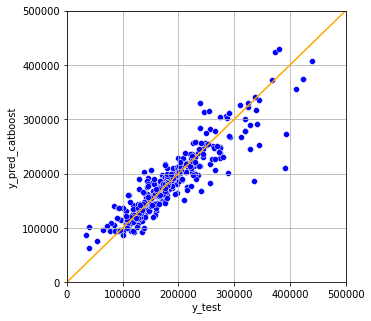

In [66]:
plt.figure(figsize=(5, 5))
sns.scatterplot(y_test[:, 0], y_pred, color = 'blue');
plt.plot([0, 500000], [0, 500000], color = 'orange')
plt.xlabel('y_test')
plt.ylabel('y_pred_catboost')
plt.xlim(0, 500000)
plt.ylim(0, 500000)
plt.grid()

In [67]:
score['catboost'] = RMSE
print (score)

Time['catboost'] = t1 - t0
print (Time)

{'LinearReg': 40457.68466432685, 'ridge': 32431.099636150684, 'lasso': 32393.26257064269, 'ElasticNet': 32393.26257064269, 'svr': 39982.70648150083, 'random_forest': 32802.2863536485, 'xgboost': 31425.165911402204, 'lightgbm': 33654.41144151091, 'catboost': 29718.551705787162}
{'LinearReg': 0.037998199462890625, 'ridge': 0.06058096885681152, 'lasso': 0.1528186798095703, 'ElasticNet': 1.7866275310516357, 'svr': 7.472355604171753, 'random_forest': 56.86420941352844, 'xgboost': -0.15085506439208984, 'lightgbm': 3.401000499725342, 'catboost': 39.70829892158508}


### STEP6. Compare the models

In [68]:
df_score = pd.DataFrame(score.items())

In [69]:
df_score.columns = ['Method', 'RMSE']

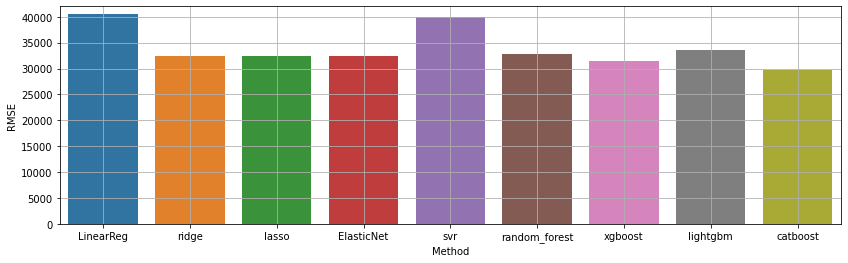

In [73]:
plt.figure(figsize=(14, 4))
sns.barplot(df_score.Method, df_score.RMSE)
plt.grid()
plt.ylim(0, 42000)
plt.show()

df_time = pd.DataFrame(Time.items())
df_time.columns = ['Method', 'Time']

plt.figure(figsize=(14, 4))
sns.barplot(df_time.Method, df_time.Time)
plt.grid()
plt.ylim(0, 40)
plt.show()

The above RMSE plot shows that Ridge, Lasso, Random Forest, XGBoost_dmatrix, and ElasticNet all have similar error.

Next I am going to use Lasso and xgboost_dmatrix method to run the prediction.

In [71]:
#filename = 'lasso_model.sav'
#pickle.dump(lr_cv, open(filename, 'wb'))

In [72]:
#filename = 'catboost_model.sav'
#pickle.dump(cb_cv, open(filename, 'wb'))

### Summary 

For this linear regression problem, I use several methods and compare the results. Based on the results, we can put them into 3 categories:

Good: Catboost performs the best among those regression algorithms. But it is the slowest.

Medium: Ridge, Lasso, ElasticNet, and tree-based methods of Random Forest, XGboost, XGboost_dmatrix, lightGBM. Especially Ridge, Lasso, ElasticNet, and XGboost run very fast.

Poor: Linear Regression and SVR

The indepedent and response variables are original values, and not transformed to log format.